<a href="https://colab.research.google.com/github/GayanMSD/dav_montgomery_crimes/blob/main/Applied_Data_Programming_Course_Work_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratary Data Analysis of Crimes in Montgomery County 2018-2022

In [ ]:
!pip install wordcloud

Import of Libraries needed for the analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from datetime import time
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud as wd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import of Dataset from the google drive

In [ ]:
uncleaned_crime_data = pd.read_csv('/content/drive/MyDrive/data/ap_assignments/Crime_Dataset_Coursework1-1.csv')

<ipython-input-107-0a810b4008d6>:1: DtypeWarning:

Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.



# Initial Data Quality Assesment

### Identifying the Dataset rows and columns

In [ ]:
uncleaned_crime_data.head(20)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
5,201204355,2404,180043926,09/03/2018 12:06:54 PM,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
6,201121509,5213,17008780,NaN,520,1,Crime Against Society,Weapon Law Violations,WEAPON - FIRING,WHEATON,14200 BLK PUNCH ST,SILVER SPRING,MD,20906.0,MCPD,Residence - Single Family,J,4J1,369,14200.0,NaN,PUNCH,NaN,ST,02/18/2017 12:18:00 AM,NaN,39.088902,-77.042262,4D,"(39.0889, -77.0423)"
7,201091648,1103,16038843,NaN,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,3900 BLK BEL PRE RD,SILVER SPRING,MD,20906.0,MCPD,Residence - Apartment/Condo,K,4K1,534,3900.0,NaN,BEL PRE,NaN,RD,07/31/2016 11:00:00 PM,08/01/2016 05:32:00 AM,39.093783,-77.076369,4D,"(39.0938, -77.0764)"
8,201108886,1399,16060247,NaN,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,700 BLK NORTHAMPTON DR,SILVER SPRING,MD,20903.0,MCPD,Residence - Apartment/Condo,H,3H2,137,700.0,NaN,NORTHAMPTON,NaN,DR,11/20/2016 09:00:00 AM,NaN,39.008359,-76.985601,3D,"(39.0084, -76.9856)"
9,201124327,9199,17012248,NaN,90Z,1,Other,All Other Offenses,POLICE INFORMATION,WHEATON,11100 BLK GEORGIA AVE,SILVER SPRING,MD,20901.0,MCPD,Residence -Townhouse/Duplex,L,4L2,352,11100.0,NaN,GEORGIA,NaN,AVE,03/08/2017 02:03:00 PM,NaN,39.036218,-77.049887,4D,"(39.0362, -77.0499)"


In [ ]:
uncleaned_crime_data['Crime Name1'].unique()

array(['Crime Against Society', 'Crime Against Property',
       'Crime Against Person', 'Other', 'Not a Crime', nan], dtype=object)

### Missing Value and Null Value analysis



In [ ]:
#Column and Row info overview
uncleaned_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [ ]:
#Column name conversion
uncleaned_crime_data.columns = uncleaned_crime_data.columns.str.lower()
uncleaned_crime_data.columns = uncleaned_crime_data.columns.str.replace(' ', '_')
uncleaned_crime_data.columns

Index(['incident_id', 'offence_code', 'cr_number', 'dispatch_date_/_time',
       'nibrs_code', 'victims', 'crime_name1', 'crime_name2', 'crime_name3',
       'police_district_name', 'block_address', 'city', 'state', 'zip_code',
       'agency', 'place', 'sector', 'beat', 'pra', 'address_number',
       'street_prefix', 'street_name', 'street_suffix', 'street_type',
       'start_date_time', 'end_date_time', 'latitude', 'longitude',
       'police_district_number', 'location'],
      dtype='object')

In [ ]:
uncleaned_crime_data.rename(columns={"dispatch_date_/_time": "dispatch_date_time"}, inplace=True)
uncleaned_crime_data.columns

Index(['incident_id', 'offence_code', 'cr_number', 'dispatch_date_time',
       'nibrs_code', 'victims', 'crime_name1', 'crime_name2', 'crime_name3',
       'police_district_name', 'block_address', 'city', 'state', 'zip_code',
       'agency', 'place', 'sector', 'beat', 'pra', 'address_number',
       'street_prefix', 'street_name', 'street_suffix', 'street_type',
       'start_date_time', 'end_date_time', 'latitude', 'longitude',
       'police_district_number', 'location'],
      dtype='object')

In [ ]:
#Conversion of date time
uncleaned_crime_data['start_date_time'] = pd.to_datetime(uncleaned_crime_data['start_date_time'])
uncleaned_crime_data['end_date_time'] = pd.to_datetime(uncleaned_crime_data['end_date_time'])
uncleaned_crime_data['dispatch_date_time'] = pd.to_datetime(uncleaned_crime_data['dispatch_date_time'])

<ipython-input-113-e09eb006d6c7>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-113-e09eb006d6c7>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
uncleaned_crime_data.head(20)

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
5,201204355,2404,180043926,2018-09-03 12:06:54,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
6,201121509,5213,17008780,NaT,520,1,Crime Against Society,Weapon Law Violations,WEAPON - FIRING,WHEATON,14200 BLK PUNCH ST,SILVER SPRING,MD,20906.0,MCPD,Residence - Single Family,J,4J1,369,14200.0,NaN,PUNCH,NaN,ST,2017-02-18 00:18:00,NaT,39.088902,-77.042262,4D,"(39.0889, -77.0423)"
7,201091648,1103,16038843,NaT,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,3900 BLK BEL PRE RD,SILVER SPRING,MD,20906.0,MCPD,Residence - Apartment/Condo,K,4K1,534,3900.0,NaN,BEL PRE,NaN,RD,2016-07-31 23:00:00,2016-08-01 05:32:00,39.093783,-77.076369,4D,"(39.0938, -77.0764)"
8,201108886,1399,16060247,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,700 BLK NORTHAMPTON DR,SILVER SPRING,MD,20903.0,MCPD,Residence - Apartment/Condo,H,3H2,137,700.0,NaN,NORTHAMPTON,NaN,DR,2016-11-20 09:00:00,NaT,39.008359,-76.985601,3D,"(39.0084, -76.9856)"
9,201124327,9199,17012248,NaT,90Z,1,Other,All Other Offenses,POLICE INFORMATION,WHEATON,11100 BLK GEORGIA AVE,SILVER SPRING,MD,20901.0,MCPD,Residence -Townhouse/Duplex,L,4L2,352,11100.0,NaN,GEORGIA,NaN,AVE,2017-03-08 14:03:00,NaT,39.036218,-77.049887,4D,"(39.0362, -77.0499)"


In [ ]:
#Records date check
print(uncleaned_crime_data['start_date_time'].min())
print(uncleaned_crime_data['start_date_time'].max())

2016-07-01 00:00:00
2022-08-07 18:15:00


In [ ]:
#Since the records we consider is from 2018-2022
#Filter the data needed
uncleaned_crime_data = uncleaned_crime_data.loc[uncleaned_crime_data['start_date_time'] >= '2018-01-01 00:00:00']

In [ ]:
#Records date check to verify
print(uncleaned_crime_data['start_date_time'].min())
print(uncleaned_crime_data['start_date_time'].max())

2018-01-01 00:00:00
2022-08-07 18:15:00


In [ ]:
#Sum of null values in each column
display(uncleaned_crime_data.isna().sum())

,0
incident_id,0
offence_code,0
cr_number,0
dispatch_date_time,6840
nibrs_code,0
victims,0
crime_name1,259
crime_name2,259
crime_name3,259
police_district_name,94


In [ ]:
#Missing value percentage
display((uncleaned_crime_data.isna().sum()/len(uncleaned_crime_data)) * 100)

,0
incident_id,0.000000
offence_code,0.000000
cr_number,0.000000
dispatch_date_time,3.087130
nibrs_code,0.000000
victims,0.000000
crime_name1,0.116896
crime_name2,0.116896
crime_name3,0.116896
police_district_name,0.042425


In [ ]:
#Detecting duplicates
uncleaned_crime_data.duplicated().sum()

0

## Outlier Detection

In [ ]:
#Outlier Detection Function using IQR Method

def outlier_detection(df, feature):

  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print("Descriptive Statistics for " + feature)
  print(df[feature].describe())
  print("Lower Bound - " + str(lower_bound))
  print("Upper Bound - " + str(upper_bound))

  plt.figure(figsize=(16,8))
  plt.subplot(2, 2, 1)
  sns.histplot(x=df[feature], kde=True) #distribution plot to view the distribution
  plt.subplot(2, 2, 2)
  sns.boxplot(x=df[feature]) #box plot to view the outlier distribution
  print()
  print("Outliers")
  print(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])

Descriptive Statistics for victims
count    221565.000000
mean          1.023754
std           0.191768
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: victims, dtype: float64
Lower Bound - 1.0
Upper Bound - 1.0

Outliers
        incident_id offence_code  cr_number  dispatch_date_time nibrs_code  \
80        201261625         1399  190050287 2019-10-20 02:30:00        13B   
146       201292971         1399  200025327 2020-06-29 17:18:19        13B   
157       201340170         1399  210029773 2021-08-01 00:33:18        13B   
249       201336398         1399  210025016 2021-06-29 23:24:56        13B   
257       201235970         1314  190018440 2019-04-19 23:56:02        13A   
...             ...          ...        ...                 ...        ...   
305904    201323713         1399  210010057 2021-03-17 18:39:36        13B   
305928    201319736         1313  210005673 2021-02-13 07:43:55        13B   
306

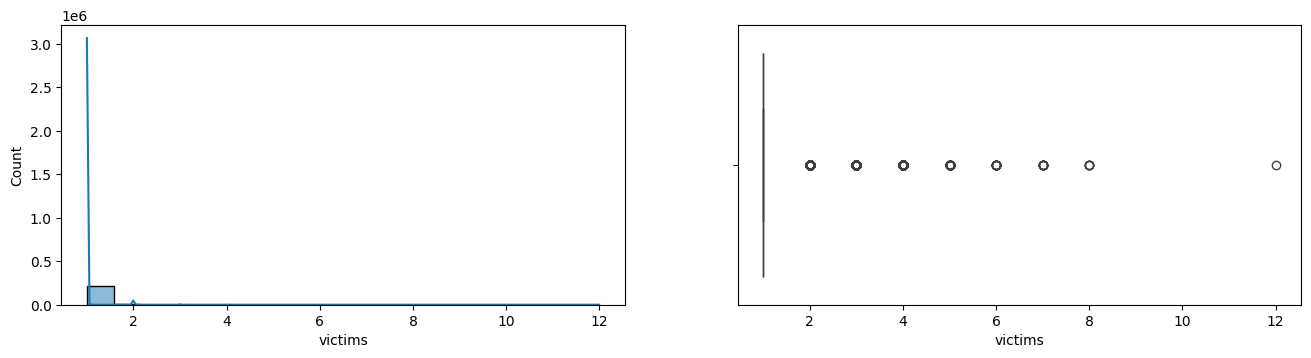

In [ ]:
outlier_detection(uncleaned_crime_data, 'victims')

Descriptive Statistics for latitude
count    221565.000000
mean         37.831776
std           6.877184
min           0.000000
25%          39.017351
50%          39.071533
75%          39.141428
max          90.000000
Name: latitude, dtype: float64
Lower Bound - 38.831234589000005
Upper Bound - 39.327544589

Outliers
        incident_id offence_code  cr_number  dispatch_date_time nibrs_code  \
13        201357499         5404  210051644 2021-12-18 23:30:27        90D   
42        201358863         5404  210053293 2021-12-31 01:47:33        90D   
53        201346532         2305  210037745 2021-09-24 05:25:58        23F   
162       201357957         9105  210052242 2021-12-22 17:25:02        90Z   
200       201336300         2303  210024908 2021-06-29 11:47:11        23C   
...             ...          ...        ...                 ...        ...   
304884    201326011         5404  210012406 2021-04-03 00:41:14        90D   
305211    201319591         5404  210005499 2021-02-11 

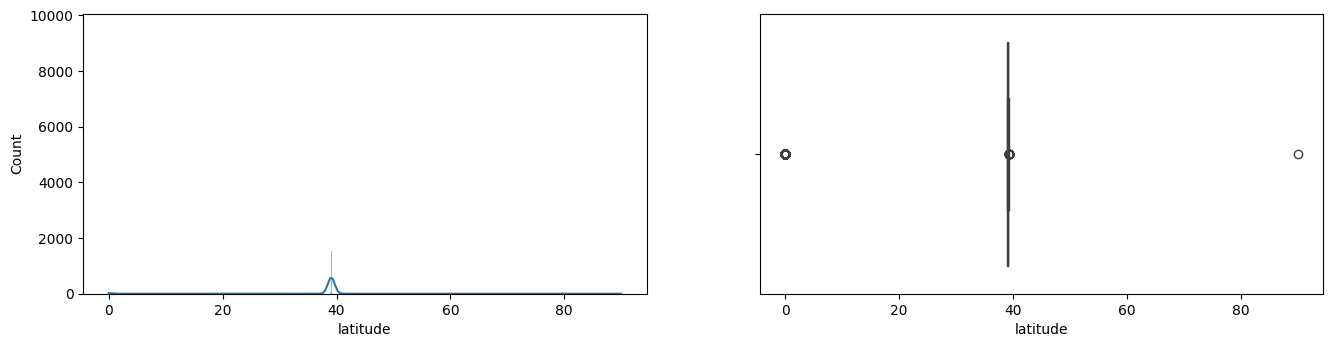

In [ ]:
outlier_detection(uncleaned_crime_data, 'latitude')

Descriptive Statistics for longitude
count    221565.000000
mean        -74.649332
std          13.567976
min         -77.516753
25%         -77.196800
50%         -77.098992
75%         -77.028170
max           0.000000
Name: longitude, dtype: float64
Lower Bound - -77.44974464299999
Upper Bound - -76.77522559500001

Outliers
        incident_id offence_code  cr_number  dispatch_date_time nibrs_code  \
13        201357499         5404  210051644 2021-12-18 23:30:27        90D   
42        201358863         5404  210053293 2021-12-31 01:47:33        90D   
53        201346532         2305  210037745 2021-09-24 05:25:58        23F   
162       201357957         9105  210052242 2021-12-22 17:25:02        90Z   
200       201336300         2303  210024908 2021-06-29 11:47:11        23C   
...             ...          ...        ...                 ...        ...   
304884    201326011         5404  210012406 2021-04-03 00:41:14        90D   
305211    201319591         5404  210005499 202

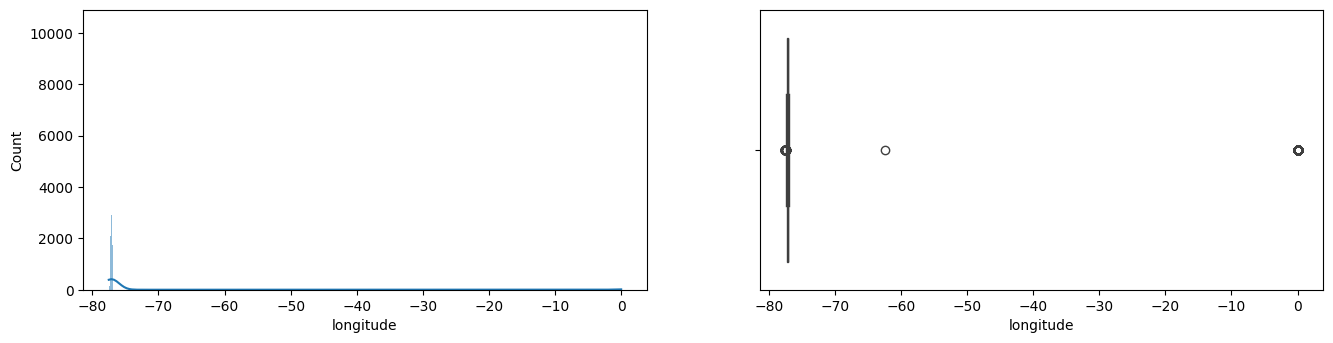

In [ ]:
outlier_detection(uncleaned_crime_data, 'longitude')

# Data Cleaning

In [ ]:
display(uncleaned_crime_data.groupby('nibrs_code').agg({'crime_name1': lambda x: x.isnull().sum(), 'crime_name2': lambda x: x.isnull().sum(), 'crime_name3': lambda x: x.isnull().sum()}))

,crime_name1,crime_name2,crime_name3
nibrs_code,,,
09A,0,0,0
09B,0,0,0
09C,0,0,0
100,0,0,0
11A,0,0,0
11B,0,0,0
11C,0,0,0
11D,0,0,0
120,0,0,0


When we check the NIBRS Code we are able to fill the crime_name1 and crime_name2

When we group null values based on NIBRS code we were able to find that
90Z -

In [ ]:
#When we check the NIBRS Code we are able to fill the crime_name1 and crime_name2 based on nibrs code
#Link - https://ucr.fbi.gov/nibrs/2011/resources/nibrs-offense-codes and https://ijis.org/wp-content/uploads/2022/06/nibrs_offenses_with_mandator.pdf
def crime_name_fill_value(df, nibrs_code, crime_name1, crime_name2):

  df['crime_name1'] = df.apply(
      lambda row: crime_name1 if (row['nibrs_code'] == nibrs_code) and pd.isna(row['crime_name1']) else row['crime_name1'],
      axis=1
    )

  df['crime_name2'] = df.apply(
      lambda row: crime_name2 if (row['nibrs_code'] == nibrs_code) and pd.isna(row['crime_name2']) else row['crime_name2'],
      axis=1
    )
  return df

In [ ]:
#Replacing Crime Name with NIBRS Code 90Z
uncleaned_crime_data = crime_name_fill_value(uncleaned_crime_data, '90Z', 'Crime Against Society/Property/Person', 'All Other Offence')

In [ ]:
#Replacing Crime Name with NIBRS Code 26G
uncleaned_crime_data = crime_name_fill_value(uncleaned_crime_data, '26G', 'Crime Against Property', 'Hacking/Computer Invasion')

In [ ]:
#Replacing Crime Name with NIBRS Code 35A
uncleaned_crime_data = crime_name_fill_value(uncleaned_crime_data, '35A', 'Crime Against Society', 'Drug/Narcotic Violations')

In [ ]:
uncleaned_crime_data.groupby('crime_name1').size()

,0
crime_name1,
Crime Against Person,22808
Crime Against Property,103323
Crime Against Society,45293
Crime Against Society/Property/Person,68
Not a Crime,2552
Other,47521


In [ ]:
uncleaned_crime_data.groupby('nibrs_code').agg({'crime_name1': lambda x: x.isnull().sum(), 'crime_name2': lambda x: x.isnull().sum()})

,crime_name1,crime_name2
nibrs_code,,
09A,0,0
09B,0,0
09C,0,0
100,0,0
11A,0,0
11B,0,0
11C,0,0
11D,0,0
120,0,0


In [ ]:
#Sum of null values in each column
uncleaned_crime_data.isna().sum()

,0
incident_id,0
offence_code,0
cr_number,0
dispatch_date_time,6840
nibrs_code,0
victims,0
crime_name1,0
crime_name2,0
crime_name3,259
police_district_name,94


In [ ]:
#Police District Name
pd.set_option('display.max_columns', None)
data_police_district_null = uncleaned_crime_data[uncleaned_crime_data['police_district_name'].isna()]
data_police_district_null

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location
230,201341402,1399,210031282,2021-08-12 03:10:15,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,NaN,7200 BLK CARROLL AVE,TAKOMA PARK,MD,20912.0,TPPD,Street - Bus Stop,T,8T2,804,7200.0,NaN,CARROLL,NaN,AVE,2021-08-12 03:00:00,2021-08-12 03:08:00,38.977784,-77.007387,8.0D,"(38.9778, -77.0074)"
1687,201341060,9107,210029899,2021-08-02 06:12:17,90Z,1,Other,All Other Offenses,MISSING PERSON,NaN,7700 BLK MAPLE AVE,TAKOMA PARK,MD,20912.0,TPPD,Parking Lot - Residential,T,8T2,804,7700.0,NaN,MAPLE,NaN,AVE,2021-08-02 06:12:00,NaT,38.983979,-77.005288,8.0D,"(38.984, -77.0053)"
2178,201339152,9199,210028521,2021-07-23 10:44:41,90Z,1,Other,All Other Offenses,POLICE INFORMATION,NaN,7500 BLK MAPLE AVE,TAKOMA PARK,MD,20912.0,TPPD,Other/Unknown,T,8T2,804,7500.0,NaN,MAPLE,NaN,AVE,2021-07-23 10:45:00,2021-07-23 10:45:00,38.981039,-77.010292,8.0D,"(38.981, -77.0103)"
2452,201338635,2799,210027897,2021-07-19 14:52:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),NaN,8300 BLK EASTRIDGE AVE,TAKOMA PARK,MD,20912.0,TPPD,Bank - ATM,T,8T2,803,8300.0,NaN,EASTRIDGE,NaN,AVE,2021-06-02 12:00:00,2021-06-08 12:00:00,38.992360,-77.003152,8.0D,"(38.9924, -77.0032)"
2855,201339765,2303,210029312,2021-07-28 19:05:00,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,NaN,700 BLK HUNGERFORD DR,ROCKVILLE,MD,20850.0,MCPD,Grocery/Supermarket,A,1A3,251,700.0,NaN,HUNGERFORD,NaN,DR,2021-07-28 19:05:00,NaT,39.093088,-77.153434,1.0D,"(39.0931, -77.1534)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23107,201338552,2304,210027780,2021-07-18 18:44:11,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,NaN,6300 BLK EASTERN AVE,NaN,MD,20912.0,TPPD,Street - Residential,T,8T1,802,6300.0,NaN,EASTERN,NaN,AVE,2021-07-18 18:44:00,NaT,38.966561,-77.003555,8.0D,"(38.9666, -77.0036)"
25184,201338793,2308,210028078,2021-07-20 18:43:46,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,NaN,1100 BLK HILLWOOD CT,TAKOMA PARK,MD,20912.0,TPPD,Residence - Single Family,T,8T3,808,1100.0,NaN,HILLWOOD,NaN,CT,2021-06-30 22:00:00,2021-07-20 16:50:00,38.977640,-76.989192,8.0D,"(38.9776, -76.9892)"
25399,201340496,2304,210030210,2021-08-04 09:10:17,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,NaN,7200 BLK CENTRAL AVE,TAKOMA PARK,MD,20912.0,TPPD,Street - Residential,T,8T2,805,7200.0,NaN,CENTRAL,NaN,AVE,2021-08-04 09:10:00,NaT,38.982195,-76.993335,8.0D,"(38.9822, -76.9933)"
28045,201339480,9199,210028941,2021-07-26 14:16:27,90Z,2,Other,All Other Offenses,POLICE INFORMATION,NaN,100 BLK LEE AVE,TAKOMA PARK,MD,20912.0,TPPD,Residence - Apartment/Condo,T,8T2,804,100.0,NaN,LEE,NaN,AVE,2021-07-22 14:16:00,2021-07-26 15:00:00,38.980184,-77.006724,8.0D,"(38.9802, -77.0067)"


In [ ]:
data_police_district_null['police_district_number'].unique()

array(['8.0D', '1.0D', '3.0D', '6.0D', '4.0D', '5.0D'], dtype=object)

In [ ]:
data_police_district_not_null = uncleaned_crime_data[~uncleaned_crime_data['police_district_name'].isna()]
data_police_district_not_null['police_district_number'].unique()

array(['5D', '2D', '6D', '1D', '3D', '4D', '8D', 'OTHER', 'TPPD'],
      dtype=object)

In [ ]:
uncleaned_crime_data['police_district_number'].unique()

array(['5D', '2D', '6D', '1D', '3D', '4D', '8D', 'OTHER', '8.0D', 'TPPD',
       '1.0D', '3.0D', '6.0D', '4.0D', '5.0D'], dtype=object)

From the above two code snippets we can see there is a data mismatch and police_district_name has been null for these codes
*   1.0D => 1D
*   3.0D => 3D
*   4.0D => 4D
*   5.0D => 5D
*   6.0D => 6D
*   8.0D => 8D

Checking police_distict_number and police_district_name has any relationship

In [ ]:
district_number_relationship = uncleaned_crime_data.groupby('police_district_number')['police_district_name'].unique()
print(district_number_relationship)

police_district_number
1.0D                     [nan]
1D                 [ROCKVILLE]
2D                  [BETHESDA]
3.0D                     [nan]
3D             [SILVER SPRING]
4.0D                     [nan]
4D                   [WHEATON]
5.0D                     [nan]
5D                [GERMANTOWN]
6.0D                     [nan]
6D        [MONTGOMERY VILLAGE]
8.0D                     [nan]
8D       [CITY OF TAKOMA PARK]
OTHER                  [OTHER]
TPPD             [TAKOMA PARK]
Name: police_district_name, dtype: object


From the above data set we can clearly see that there is a one-to-one relationship between `police_district_number` and `police_district_name`

Now we can write a function to change the `police_district_number` mismatch and `police_district_name`


In [ ]:
def correct_police_mismatch(df, wrng_police_dist, corr_police_dist, corr_police_dist_name):
  df['police_district_number'] = df.apply(
      lambda row: corr_police_dist if row['police_district_number'] == wrng_police_dist else row['police_district_number'],
      axis=1
    )

  df['police_district_name'] = df.apply(
      lambda row: corr_police_dist_name if row['police_district_number'] == corr_police_dist else row['police_district_name'],
      axis=1
    )
  return df

In [ ]:
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '1.0D', '1D', 'ROCKVILLE')
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '3.0D', '3D', 'SILVER SPRING')
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '4.0D', '4D', 'WHEATON')
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '5.0D', '5D', 'GERMANTOWN')
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '6.0D', '6D', 'MONTGOMERY VILLAGE')
uncleaned_crime_data = correct_police_mismatch(uncleaned_crime_data, '8.0D', '8D', 'CITY OF TAKOMA PARK')

In [ ]:
district_number_relationship = uncleaned_crime_data.groupby('police_district_number')['police_district_name'].unique()
print(district_number_relationship)

police_district_number
1D                 [ROCKVILLE]
2D                  [BETHESDA]
3D             [SILVER SPRING]
4D                   [WHEATON]
5D                [GERMANTOWN]
6D        [MONTGOMERY VILLAGE]
8D       [CITY OF TAKOMA PARK]
OTHER                  [OTHER]
TPPD             [TAKOMA PARK]
Name: police_district_name, dtype: object


In [ ]:
#Missing value percentage
(uncleaned_crime_data.isna().sum()/len(uncleaned_crime_data)) * 100

,0
incident_id,0.000000
offence_code,0.000000
cr_number,0.000000
dispatch_date_time,3.087130
nibrs_code,0.000000
victims,0.000000
crime_name1,0.000000
crime_name2,0.000000
crime_name3,0.116896
police_district_name,0.000000


In [ ]:
sector_beat_null = uncleaned_crime_data.loc[uncleaned_crime_data['sector'].isna()]
sector_beat_null

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location
200,201336300,2303,210024908,2021-06-29 11:47:11,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,OTHER,5300 BLK WISCONSIN AVE NW,CHEVY CHASE,DC,20815.0,MCPD,Retail - Department/Discount Store,NaN,NaN,NaN,5300.0,NaN,WISCONSIN,NW,AVE,2021-06-27 16:00:00,2021-06-27 16:05:00,0.00000,0.0000,OTHER,"(0.0, 0.0)"
395,201354732,2305,210048176,2021-11-27 15:16:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,TAKOMA PARK,6400 BLK NEW HAMPSHIRE AVE,TAKOMA PARK,MD,20912.0,TPPD,Gas Station,NaN,NaN,802,6400.0,NaN,NEW HAMPSHIRE,NaN,AVE,2021-11-27 15:16:00,2021-11-27 00:00:00,38.96775,-77.0015,TPPD,"(38.9678, -77.0015)"
784,201333416,2305,210021334,2021-06-05 10:44:40,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,TAKOMA PARK,900 BLK E WEST HWY,TAKOMA PARK,MD,20912.0,TPPD,Parking Lot - Commercial,NaN,NaN,808,900.0,E,WEST,NaN,HWY,2021-06-05 10:44:00,NaT,39.12561,-77.2032,TPPD,"(39.1256, -77.2032)"
854,201345513,9105,210036449,2021-09-15 21:00:24,90Z,1,Other,All Other Offenses,LOST PROPERTY,TAKOMA PARK,7500 BLK MAPLE AVE,TAKOMA PARK,MD,20912.0,TPPD,Street - Other,NaN,NaN,804,7500.0,NaN,MAPLE,NaN,AVE,2021-09-15 21:00:00,NaT,38.98160,-77.0103,TPPD,"(38.9816, -77.0103)"
1096,201350516,2408,210042823,2021-10-24 17:01:47,280,1,Crime Against Property,Stolen Property Offenses,AUTO THEFT - POSSESS STOLEN VEHICLE,TAKOMA PARK,7300 BLK NEW HAMPSHIRE AVE,TAKOMA PARK,MD,20912.0,TPPD,Parking Lot - Residential,NaN,NaN,807,7300.0,NaN,NEW HAMPSHIRE,NaN,AVE,2021-10-24 17:01:00,NaT,38.98150,-76.9898,TPPD,"(38.9815, -76.9898)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286148,201316497,2999,200050842,2020-12-26 15:36:02,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),OTHER,8500 BLK NEW HAMPSHIRE AVE,HYATTSVILLE,MD,20783.0,MCPD,Street - Residential,NaN,NaN,NaN,8500.0,NaN,NEW HAMPSHIRE,NaN,AVE,2020-12-26 15:00:00,2020-12-26 15:10:00,0.00000,0.0000,OTHER,"(0.0, 0.0)"
290089,201315848,3562,210001165,2021-01-09 23:15:28,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,OTHER,7900 BLK NEW HAMPSHIRE AVE,HYATTSVILLE,MD,20783.0,TPPD,Street - Alley,NaN,NaN,NaN,7900.0,NaN,NEW HAMPSHIRE,NaN,AVE,2021-01-09 23:16:00,NaT,0.00000,0.0000,OTHER,"(0.0, 0.0)"
292992,201303585,1213,200037920,2020-09-26 20:53:58,120,1,Crime Against Property,Robbery,ROBBERY - GUN,OTHER,NaN,SILVER SPRING,MD,20783.0,MCPD,Street - Residential,NaN,NaN,NaN,NaN,NaN,PINEY BRANCH,NaN,RMP,2020-09-25 19:00:00,2020-09-25 20:00:00,0.00000,0.0000,OTHER,"(0.0, 0.0)"
293826,201306516,2103,200041455,2020-10-20 19:21:57,210,1,Crime Against Property,Extortion/Blackmail,EXTORT - THREAT INJURE REPUTATION,OTHER,3200 BLK TOLEDO PL,HYATTSVILLE,MD,20782.0,MCPD,Residence -Townhouse/Duplex,NaN,NaN,NaN,3200.0,NaN,TOLEDO,NaN,PL,2020-10-20 20:59:00,NaT,0.00000,0.0000,OTHER,"(0.0, 0.0)"


When examining null set for beat and sector we can see that data that `beat` and `sector` not available has a relationship with `police_district_number`

In [ ]:
uncleaned_crime_data.groupby('police_district_number').agg({'beat': lambda x: x.isnull().sum(), 'sector': lambda x: x.isnull().sum()})

,beat,sector
police_district_number,,
1D,0,0
2D,0,0
3D,0,0
4D,0,0
5D,0,0
6D,0,0
8D,0,0
OTHER,234,234
TPPD,1277,1277


It is clear that if the beat and sector not available they are in OTHER or TPPD `police_district_number`

In [ ]:
uncleaned_crime_data.groupby('police_district_number')['beat'].unique()

,beat
police_district_number,
1D,"[1A3, 1B2, 1A1, 1B1, 1A2, 1A4, 1B3, 1B4]"
2D,"[2E2, 2E1, 2D2, 2E3, 2E4, 2D4, 2D3, 2D1]"
3D,"[3I1, 3I2, 3G1, 3G2, 3H2, 3H1, 3G4, 3G5, 3G3, ..."
4D,"[4K1, 4J1, 4L2, 4J2, 4K2, 4L1]"
5D,"[5N1, 5M1, 5N2, 5M2, 5M3, 5N3]"
6D,"[6P2, 6R1, 6R2, 6P1, 6P3, 6R3, 6P6, 6P4, 1R2]"
8D,"[8T2, 8T3, 8T1]"
OTHER,[nan]
TPPD,[nan]


In [ ]:
uncleaned_crime_data.groupby('police_district_number')['sector'].unique()

,sector
police_district_number,
1D,"[A, B]"
2D,"[E, D]"
3D,"[I, G, H, P]"
4D,"[K, J, L]"
5D,"[N, M]"
6D,"[P, R]"
8D,[T]
OTHER,[nan]
TPPD,[nan]


Since OTHER and TPPD is not predefined beat and sector so we will replace null values with OTHER

In [ ]:
def clear_beat_sector(df, police_district_number):
  df['beat'] = df.apply(
      lambda row: 'Other' if row['police_district_number'] == police_district_number else row['beat'],
      axis=1
    )

  df['sector'] = df.apply(
      lambda row: 'Other' if row['police_district_number'] == police_district_number else row['sector'],
      axis=1
    )
  return df

In [ ]:
uncleaned_crime_data = clear_beat_sector(uncleaned_crime_data, 'OTHER')
uncleaned_crime_data = clear_beat_sector(uncleaned_crime_data, 'TPPD')

In [ ]:
uncleaned_crime_data.groupby('police_district_number')['sector'].unique()

,sector
police_district_number,
1D,"[A, B]"
2D,"[E, D]"
3D,"[I, G, H, P]"
4D,"[K, J, L]"
5D,"[N, M]"
6D,"[P, R]"
8D,[T]
OTHER,[Other]
TPPD,[Other]


## Geographical Data Cleaning

In [ ]:
uncleaned_crime_data['state'].unique()

array(['MD', 'DC', '16', 'VA', 'ND', 'MS', 'ME', '0', 'MC', '17'],
      dtype=object)

When checking unique values we can see there are numbers and when further analyzed was able to analyze number 16 and 17 are fips codes

https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm

In [ ]:
def correct_state(df, fip_code, correct_state):
  df['state'] = df.apply(
      lambda row: correct_state if row['state'] == fip_code else row['state'],
      axis=1
    )
  return df

In [ ]:
uncleaned_crime_data = correct_state(uncleaned_crime_data, '16', 'ID')
uncleaned_crime_data = correct_state(uncleaned_crime_data, '17', 'IL')

In [ ]:
uncleaned_crime_data['city'].unique()

array(['GERMANTOWN', 'BETHESDA', 'GAITHERSBURG', 'CHEVY CHASE',
       'ROCKVILLE', 'SILVER SPRING', 'TAKOMA PARK', 'POTOMAC',
       'BURTONSVILLE', 'OLNEY', 'GLEN ECHO', 'KENSINGTON', 'BOYDS',
       'CLARKSBURG', 'DERWOOD', 'DAMASCUS', 'SANDY SPRING', 'DICKERSON',
       'MONTGOMERY VILLAGE', nan, 'POOLESVILLE', 'WASHINGTON GROVE',
       'BROOKEVILLE', 'CABIN JOHN', 'ASHTON', 'SILVERS SPRING', 'MT AIRY',
       'GARRETT PARK', 'SPENCERVILLE', 'BEALLSVILLE', 'WASHINGTON',
       'HYATTSVILLE', 'ROCKVIILE', 'BRINKLOW', 'BARNESVILLE', 'LAUREL',
       'GAITHERSBUG', 'MOUNT AIRY', 'BELTSVILLE', 'WHEATON',
       'FALLS CHURCH', 'FRIENDSHIP HEIGHTS', 'COLLEGE PARK',
       'NORTH POTOMAC', 'CLAEKSBURG', 'NORTH BETHESDA', 'HIGHLAND',
       'CAPITOL HEIGHTS', 'GAIHTERSBURG', 'RIVERDALE', 'MOUNT RAINIER',
       '0', 'ALEXANDRIA', 'BETHEDA', 'HAGERSTOWN', 'WOODBINE', 'VIENNA',
       'WEST FRIENDSHIP', 'MCLEAN', 'TACOMA PARK', 'ROCKVILLLE',
       'ADELPHI', 'BOWIE', 'LANHAM', 'GREENBELT'

When examining the Cities it is vicible that there are some cities where mispellings are there...

| Mispelled City Name | Correct City Name |
| --- | --- |
| SILVERS SPRING | SILVER SPRING |
| ROCKVIILE | ROCKVILLE |
| ROCKVILLLE | ROCKVILLE |
| GAITHERSBUG | GAITHERSBUG |
| GAIHTERSBURG | GAITHERSBUG |
| CLAEKSBURG | CLARKSBURG |
| TACOMA PARK | TAKOMA PARK |
| BETHEDA | BETHESDA |
| MT AIRY | MOUNT AIRY |


In [ ]:
def correct_city(df, incorrect_city, correct_city):
  df['city'] = df.apply(
      lambda row: correct_city if row['city'] == incorrect_city else row['city'],
      axis=1
    )
  return df

In [ ]:
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'SILVERS SPRING', 'SILVER SPRING')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'ROCKVIILE', 'ROCKVILLE')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'ROCKVILLLE', 'ROCKVILLE')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'GAITHERSBUG', 'GAITHERSBURG')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'GAIHTERSBURG', 'GAITHERSBURG')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'CLAEKSBURG', 'CLARKSBURG')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'TACOMA PARK', 'TAKOMA PARK')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'BETHEDA', 'BETHESDA')
uncleaned_crime_data = correct_city(uncleaned_crime_data, 'MT AIRY', 'MOUNT AIRY')

There are some disparties in longitude and latitude and in some records city name state are not available. So to update these data after research, python library geopy will be used.

In [ ]:
def set_lat_long(street_name, city, state, zip_code):
  try:
    geolocator = Nominatim(user_agent="geocoder_change_lat")
    address_query = ''
    if isinstance(street_name, str):
      address_query += street_name + ' '
    if isinstance(city, str):
      if not city == '0':
        address_query += city + ' '
    if isinstance(state, str):
      address_query += state + ' '
    if zip_code:
        address_query += str(zip_code) + ' '

    location = geolocator.geocode(address_query, timeout=5)

    if location == None:
      address_query = ''
      if isinstance(city, str):
        if not city == '0':
          address_query += city + ' '
      if isinstance(state, str):
        address_query += state
      location = geolocator.geocode(address_query, timeout=5)
      if location == None:
          if isinstance(city, str):
            if not city == '0':
              address_query += city + ' '
          if zip_code:
            address_query += str(int(zip_code))
          location = geolocator.geocode(address_query, timeout=5)
          if location == None:
            return None, None
          else:
            return location.latitude, location.longitude
      else:
          return location.latitude, location.longitude
    else:
      return location.latitude, location.longitude

  except GeocoderUnavailable as e:
    print(f"Geocoding failed: {e}. Retrying in 5 seconds...")
    time.sleep(5)

In [ ]:
# for i, row in uncleaned_crime_data.iterrows():
#   if (row['latitude'] == 0 or row['latitude'] == 90) or row['longitude'] == 0:
#     lat, long = set_lat_long(row['street_name'], row['city'], row['state'], row['zip_code'])
#     if lat == None and long == None:
#       print('Street Name - ' + row['street_name'] + ' City Name - ' + row['city'] + ' State - ' + row['state'] + ' Zip - ' + str(row['zip_code']) + ' - ' + str(i))
#     else:
#       uncleaned_crime_data.at[i, 'latitude'] = lat
#       uncleaned_crime_data.at[i, 'longitude'] = long

# uncleaned_crime_data.to_csv('/content/drive/MyDrive/data/ap_assignments/cleaned_crime_data.csv', index=False)

In [ ]:
uncleaned_crime_data_after_latlongset = pd.read_csv('/content/drive/MyDrive/data/ap_assignments/cleaned_crime_data.csv')

<ipython-input-157-ba329e9e7667>:1: DtypeWarning:

Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.



Descriptive Statistics for latitude
count    221565.000000
mean         39.080784
std           0.074952
min          38.754447
25%          39.022077
50%          39.075780
75%          39.142231
max          47.287961
Name: latitude, dtype: float64
Lower Bound - 38.84184532449999
Upper Bound - 39.32246242450001

Outliers
        incident_id offence_code  cr_number   dispatch_date_time nibrs_code  \
2148      201347812         2610  210039375  2021-10-04 07:43:27        26F   
9786      201330916         3522  210018237  2021-05-14 22:16:12        35A   
9787      201330916         5404  210018237  2021-05-14 22:16:12        90D   
10570     201340153         5404  210029781  2021-08-01 02:30:41        90D   
14011     201335240         5707  210023540  2021-06-19 20:45:05        90J   
...             ...          ...        ...                  ...        ...   
207406    201312855         2404  200049195  2020-12-14 08:29:31        240   
207554    201316463         2901  210001833

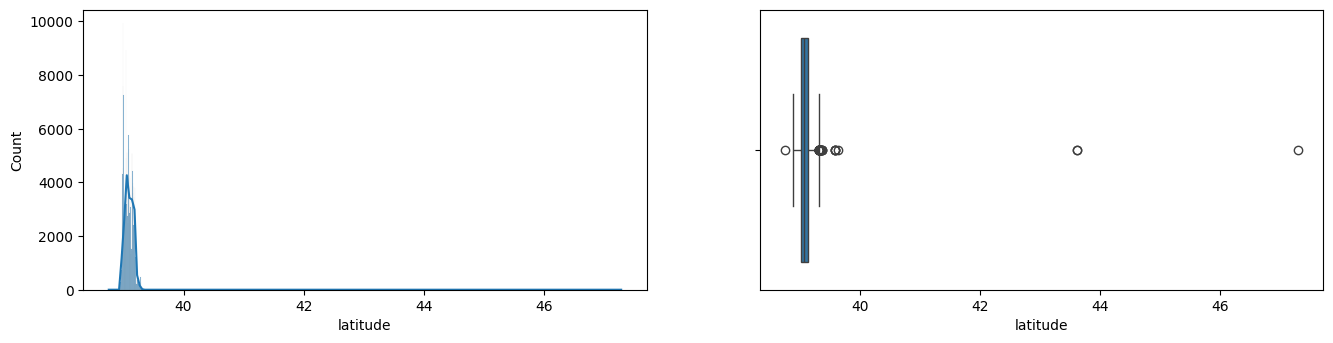

In [ ]:
#Outlier Detection after First Longitude and Latitude Correction
outlier_detection(uncleaned_crime_data_after_latlongset, 'latitude')

Descriptive Statistics for longitude
count    221565.000000
mean        -77.115220
std           0.267949
min        -116.271814
25%         -77.198303
50%         -77.106585
75%         -77.031843
max          28.567094
Name: longitude, dtype: float64
Lower Bound - -77.44799216199998
Upper Bound - -76.78215411400002

Outliers
        incident_id offence_code  cr_number   dispatch_date_time nibrs_code  \
13119     201342904         2204  210033157  2021-08-25 10:29:22        220   
13120     201342904         5707  210033157  2021-08-25 10:29:22        90J   
15030     201345081         2305  210035909  2021-09-12 15:51:53        23F   
15753     201359342         9113  220000446  2022-01-04 16:14:30        90Z   
15962     201369774         9105  220012639  2022-03-24 10:24:09        90Z   
...             ...          ...        ...                  ...        ...   
189801    201295007         2610  200027781  2020-07-17 13:28:36        26F   
192237    201291292         2901  20002

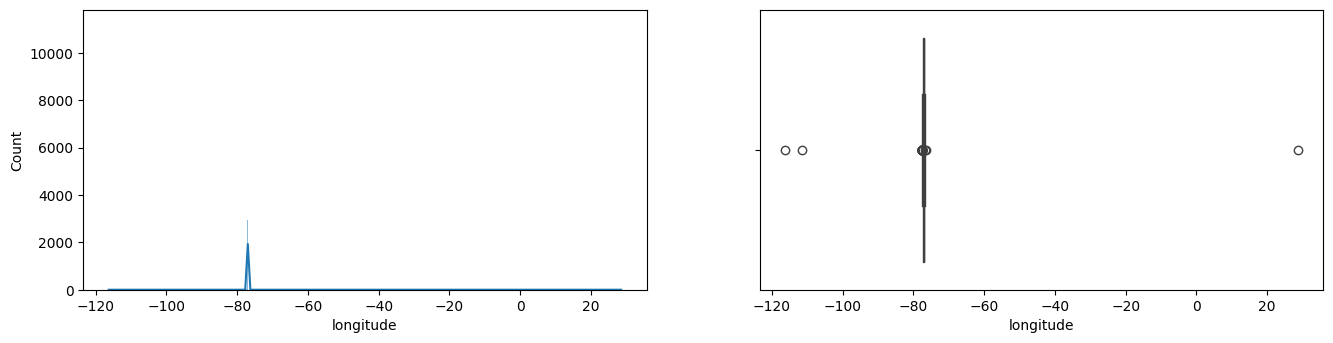

In [ ]:
outlier_detection(uncleaned_crime_data_after_latlongset, 'longitude')

In [ ]:
#Missing value percentage
(uncleaned_crime_data_after_latlongset.isna().sum()/len(uncleaned_crime_data_after_latlongset)) * 100

,0
incident_id,0.000000
offence_code,0.000000
cr_number,0.000000
dispatch_date_time,3.087130
nibrs_code,0.000000
victims,0.000000
crime_name1,0.000000
crime_name2,0.000000
crime_name3,0.116896
police_district_name,0.000000


In [ ]:
#Since there are some city data is missing lets try to fill them using Latitude and Longitude
def set_city(lat, long):
  try:
    geolocator = Nominatim(user_agent="geocoder_change_lat")
    location = geolocator.reverse(str(lat) + ',' + str(long), timeout=5)
    if location == None:
      return None
    else:
      address = location.raw['address']
      if 'city' in address:
        return address['city']
      elif 'town' in address:
        return address['town']
      elif 'village' in address:
        return address['village']
      elif 'hamlet' in address:
        return address['hamlet']
      elif 'suburb' in address:
        return address['suburb']
  except GeocoderUnavailable as e:
    print(f"Geocoding failed: {e}. Retrying in 5 seconds...")
    time.sleep(5)

In [ ]:
# for i, row in uncleaned_crime_data_after_latlongset.iterrows():
#     if pd.isna(row['city']):
#         city = set_city(row['latitude'], row['longitude'])
#         if city is None:
#             print('latitude - ' + str(row['latitude']) + ' longitude - ' + str(row['longitude']) + ' - ' + str(i))
#         else:
#             uncleaned_crime_data_after_latlongset.at[i, 'city'] = city

# uncleaned_crime_data_after_latlongset.to_csv('/content/drive/MyDrive/data/ap_assignments/full_cleaned_crime_data.csv', index=False)

In [ ]:
#Missing value percentage
(uncleaned_crime_data_after_latlongset.isna().sum()/len(uncleaned_crime_data_after_latlongset)) * 100

,0
incident_id,0.000000
offence_code,0.000000
cr_number,0.000000
dispatch_date_time,3.087130
nibrs_code,0.000000
victims,0.000000
crime_name1,0.000000
crime_name2,0.000000
crime_name3,0.116896
police_district_name,0.000000


In [ ]:
full_cleaned_crime_data = pd.read_csv('/content/drive/MyDrive/data/ap_assignments/full_cleaned_crime_data.csv')

<ipython-input-164-e843fbe8f2d3>:1: DtypeWarning:

Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
full_cleaned_crime_data

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,19300 BLK TRANSHIRE RD,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence -Townhouse/Duplex,R,6R2,544.0,19300.0,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
221561,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,12500 BLK ATHERTON DR,SILVER SPRING,MD,20906.0,MCPD,Parking Lot - Residential,K,4K2,333.0,12500.0,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)"
221562,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,300 BLK BALTUSROL DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,465.0,300.0,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)"
221563,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,7700 BLK FENTON ST,SILVER SPRING,MD,20910.0,MCPD,Street - Other,G,3G1,92.0,7700.0,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


In [ ]:
full_cleaned_crime_data['street_type'].isna().sum()

89

In [ ]:
#Lets try to fix the street_type
#To fix street type we are able to get the street type only from block address
#Lets check whether there are block addresses for null records of street_type
full_cleaned_crime_data[full_cleaned_crime_data['street_type'].isna()]['block_address'].notna().sum()

0

There are 89 records where street_type is null and for all those records block_address is also not available. Therefore we are not able to correct these records. When we are doing the analyze about street type related analysis we will remove those records and do the analyze..







# Data Tranformation

start_data_time should be transform to 5 columns as below.
*   Year
*   Month
*   Day
*   Day Name
*   Date
*   Time

In [ ]:
def start_date_time_transform(df):
  df['start_date_time'] = pd.to_datetime(df['start_date_time'])
  df['start_year'] = df['start_date_time'].dt.year
  df['start_month'] = df['start_date_time'].dt.month
  df['start_day'] = df['start_date_time'].dt.day
  df['start_day_name'] = df['start_date_time'].dt.day_name()
  df['start_date'] = df['start_date_time'].dt.date
  df['start_time'] = df['start_date_time'].dt.time
  return df

In [ ]:
full_cleaned_crime_data = start_date_time_transform(full_cleaned_crime_data)
full_cleaned_crime_data

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location,start_year,start_month,start_day,start_day_name,start_date,start_time
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,23,Thursday,2018-08-23,21:52:00
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,14,Thursday,2018-06-14,22:26:00
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2,Sunday,2018-09-02,23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,19300 BLK TRANSHIRE RD,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence -Townhouse/Duplex,R,6R2,544.0,19300.0,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)",2021,2,20,Saturday,2021-02-20,20:00:00
221561,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,12500 BLK ATHERTON DR,SILVER SPRING,MD,20906.0,MCPD,Parking Lot - Residential,K,4K2,333.0,12500.0,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)",2021,5,6,Thursday,2021-05-06,03:15:00
221562,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,300 BLK BALTUSROL DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,465.0,300.0,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)",2021,5,5,Wednesday,2021-05-05,22:38:00
221563,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,7700 BLK FENTON ST,SILVER SPRING,MD,20910.0,MCPD,Street - Other,G,3G1,92.0,7700.0,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)",2021,3,13,Saturday,2021-03-13,13:35:00


In [ ]:
#Define the Season of the year crime happned
def crime_season(df):
  df.loc[(df['start_month'] >= 3) & (df['start_month'] <= 5), 'season'] = "Spring"
  df.loc[(df['start_month'] >= 6) & (df['start_month'] <= 8), 'season'] = "Summer"
  df.loc[(df['start_month'] >= 9) & (df['start_month'] <= 11), 'season'] = "Fall"
  df.loc[(df['start_month'] >= 12) | (df['start_month'] <= 2), 'season'] = "Winter"
  return df

In [ ]:
full_cleaned_crime_data = crime_season(full_cleaned_crime_data)
full_cleaned_crime_data

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location,start_year,start_month,start_day,start_day_name,start_date,start_time,season
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,23,Thursday,2018-08-23,21:52:00,Summer
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00,Spring
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00,Spring
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,14,Thursday,2018-06-14,22:26:00,Summer
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2,Sunday,2018-09-02,23:30:00,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,19300 BLK TRANSHIRE RD,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence -Townhouse/Duplex,R,6R2,544.0,19300.0,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)",2021,2,20,Saturday,2021-02-20,20:00:00,Winter
221561,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,12500 BLK ATHERTON DR,SILVER SPRING,MD,20906.0,MCPD,Parking Lot - Residential,K,4K2,333.0,12500.0,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)",2021,5,6,Thursday,2021-05-06,03:15:00,Spring
221562,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,300 BLK BALTUSROL DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,465.0,300.0,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)",2021,5,5,Wednesday,2021-05-05,22:38:00,Spring
221563,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,7700 BLK FENTON ST,SILVER SPRING,MD,20910.0,MCPD,Street - Other,G,3G1,92.0,7700.0,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)",2021,3,13,Saturday,2021-03-13,13:35:00,Spring


In [ ]:
#Define which phase of the day crime happned
def crime_day_phase(df):
    df.loc[((df['start_time'] >= time(21, 0, 0)) | (df['start_time'] < time(5, 0, 0))), 'day_phase'] = "Night"
    df.loc[(df['start_time'] >= time(5, 0, 0)) & (df['start_time'] < time(12, 0, 0)), 'day_phase'] = "Morning"
    df.loc[(df['start_time'] >= time(12, 0, 0)) & (df['start_time'] < time(18, 0, 0)), 'day_phase'] = "Afternoon"
    df.loc[(df['start_time'] >= time(18, 0, 0)) & (df['start_time'] < time(21, 0, 0)), 'day_phase'] = "Evening"
    return df

In [ ]:
full_cleaned_crime_data = crime_day_phase(full_cleaned_crime_data)
full_cleaned_crime_data

,incident_id,offence_code,cr_number,dispatch_date_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,block_address,city,state,zip_code,agency,place,sector,beat,pra,address_number,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location,start_year,start_month,start_day,start_day_name,start_date,start_time,season,day_phase
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N1,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018,8,23,Thursday,2018-08-23,21:52:00,Summer,Night
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00,Spring,Night
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,BETHESDA,MD,20814.0,MCPD,Street - In vehicle,E,2E2,054,8300.0,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018,3,30,Friday,2018-03-30,01:01:00,Spring,Night
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,GAITHERSBURG,MD,20878.0,GPD,Hotel/Motel/Etc.,P,6P2,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018,6,14,Thursday,2018-06-14,22:26:00,Summer,Night
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,CHEVY CHASE,MD,20815.0,MCPD,Residence - Single Family,E,2E1,017,4800.0,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018,9,2,Sunday,2018-09-02,23:30:00,Fall,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,19300 BLK TRANSHIRE RD,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence -Townhouse/Duplex,R,6R2,544.0,19300.0,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)",2021,2,20,Saturday,2021-02-20,20:00:00,Winter,Evening
221561,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,12500 BLK ATHERTON DR,SILVER SPRING,MD,20906.0,MCPD,Parking Lot - Residential,K,4K2,333.0,12500.0,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)",2021,5,6,Thursday,2021-05-06,03:15:00,Spring,Night
221562,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,300 BLK BALTUSROL DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,465.0,300.0,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)",2021,5,5,Wednesday,2021-05-05,22:38:00,Spring,Night
221563,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,7700 BLK FENTON ST,SILVER SPRING,MD,20910.0,MCPD,Street - Other,G,3G1,92.0,7700.0,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)",2021,3,13,Saturday,2021-03-13,13:35:00,Spring,A

In [ ]:
## extract dataset before the data reduction
full_cleaned_crime_data_with_disp_dt = full_cleaned_crime_data.copy()
full_cleaned_crime_data_with_disp_dt.to_csv('/content/drive/MyDrive/data/ap_assignments/final_crime_data_set_rev1.csv', index=False)

## Data Reduction

Following Columns will be dropped
* crime_name3
* dispatch_date_time
* zip_code
* beat
* pra
* block_address
* address_number
* street_prefix
* street_suffix
* start_date_time
* end_date_time
* location



In [ ]:
final_crime_data_set = full_cleaned_crime_data.drop(columns=['crime_name3', 'dispatch_date_time', 'block_address', 'zip_code', 'beat', 'pra', 'address_number', 'street_prefix', 'street_suffix', 'start_date_time', 'end_date_time', 'location'])

### Saving Final Dataset in drive

In [ ]:
final_crime_data_set.to_csv('/content/drive/MyDrive/data/ap_assignments/final_crime_data_set.csv', index=False)

# EDA


## A. Inroduction

Exploratory data analysis (EDA) is an important step in data analysis and involves working with datasets in order to get a first impression about their main properties.
The idea of EDA is to :

*   Understand the dataset with the aid of methods such as Descriptive statistics.
*   Identify the singularities, abnormalities, and main characteristics of the dataset.
* Identify the correlation and coefficiant of the dataset with the aid of Inferential statistics.
* Identify Patterns and Trends
* Identify the crucial features of the dataset


## B. Descriptive Statistics
When we are analizing the dataset we Measures of central tendency condense data into comprehensible forms that can be analyzed easily. They offer a mechanism of invoking simple numerical or graphical tool to display the fundamental aspects of a pertinent dataset. Descriptive statistics contains measures of central tendency, measures of variability and measures of distribution.




### Univariate analysis
So normally we start with [univariate analysis](https://www.enjoyalgorithms.com/blog/univariate-bivariate-multivariate-analysis) because it provides statistical information about single feature, such as mean, Median, Mod, standard deviation, minimum and maximum
*   Mean : The mean is simply the regular average of all the values of a set of data and is obtained by adding together all the values and dividing by the total number of values. For an Example sum of incident divided ny the total incident according to the following formula.

![initialDataset.png](https://www.investopedia.com/thmb/64jLYMHq-G75Bap7mnDuUfeb5OM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/latex_Arithmetic_Mean_Final-5c54b505c9e77c00016b2d39.png) [ref:](https://www.investopedia.com/terms/m/mean.asp)


*   Median: Like the mean, the median is also measure of central tendency, but it is defined as the middle number of a set of numbers arranged in order of ascending or descending order.
![initialDataset.png](https://i0.wp.com/itfeature.com/wp-content/uploads/2014/12/Median.jpg?resize=1024%2C379&ssl=1) [ref:](https://itfeature.com/statistics/averages/median-definition/)


* Mode : The mode is another measure of central tendency, representing the value or values that appear most frequently in a dataset. A dataset can have one mode, more than one mode, or no mode at all.

![initialDataset.png](https://cdn1.byjus.com/wp-content/uploads/2018/11/maths/2016/08/04100523/mo2.png)

Where,

l = lower limit of the modal class

h = size of the class interval

f1 = frequency of the modal class

f0 = frequency of the class preceding the modal class

f2 = frequency of the class succeeding the modal class

Let us take an example to understand this clearly.

[ref:](https://byjus.com/maths/mode/)



## C. Inferential statistics
Inferential statistics helps us to find out overview of association of features using various analytical methods such as Correlation Analysis,  Regression Analysis and ANOVA

### Bivariate Analysis
And then we move on to [Bivariate Analysis](https://) it is a another statistical technique to find out association or correlation between two features , this can be continues , categorical or a combination of both.
to find association between two or more features folowing methods can be used .

#### Correlation Analysis:
Measures the strength and direction of the relationship between two continuous variables. The Pearson correlation coefficient is commonly used for this.

*  covariance : Covariance indicates the direction of the relationship between two variables. It can be positive, negative, or zero. But this method does not provide a standardized value , that mean its magnitude depends on the unit of the feature involved , disadvantage of this method it will difficult to compare across different datasets.

*   Correlation : particularly the Pearson Correlation, quantifies both the strength as well as the direction of the linear relationship between two features It calculates a covariance and divides it by the product of the standard deviations of the two variables under consideration, hence produces a result of between -1 and 1.

#### Regression Analysis :

In regression analysis there are sevaral techniques available and they can be used according to the association type of the independant and dependant variables . In practice, Linear Regression and Logistic Regression are the most commonly used models,

* Linear Regression :  is a foundational method for simple linear relationships.In simple linear regression, there's just one independent variable.

The equation for simple linear regression is:

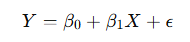

 Where:

Y is the dependent variable (the outcome we are trying to predict),

X is the independent variable (the predictor),

𝛽
0
  is the intercept (the value of Y when X = 0),

β
1
​ is the slope (how much Y changes for each unit change in X),

ϵ is the error term (the difference between observed and predicted values).





In [ ]:
final_crime_data_set = pd.read_csv('/content/drive/MyDrive/data/ap_assignments/final_crime_data_set.csv')

<ipython-input-177-58b1843fd5d4>:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
final_crime_data_set.shape

(221565, 26)

In [ ]:
final_crime_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221565 entries, 0 to 221564
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             221565 non-null  int64  
 1   offence_code            221565 non-null  object 
 2   cr_number               221565 non-null  int64  
 3   nibrs_code              221565 non-null  object 
 4   victims                 221565 non-null  int64  
 5   crime_name1             221565 non-null  object 
 6   crime_name2             221565 non-null  object 
 7   police_district_name    221565 non-null  object 
 8   city                    221565 non-null  object 
 9   state                   221565 non-null  object 
 10  agency                  221565 non-null  object 
 11  place                   221565 non-null  object 
 12  sector                  221565 non-null  object 
 13  street_name             221564 non-null  object 
 14  street_type         

In [ ]:
final_crime_data_set.describe()

,incident_id,cr_number,victims,latitude,longitude,start_year,start_month,start_day
count,2.215650e+05,2.215650e+05,221565.000000,221565.000000,221565.000000,221565.000000,221565.000000,221565.000000
mean,2.012778e+08,1.973933e+08,1.023754,39.080784,-77.115220,2019.719969,6.230149,15.526338
std,6.289032e+04,1.373485e+07,0.191768,0.074952,0.267949,1.350214,3.397592,8.867926
min,2.011689e+08,1.202759e+07,1.000000,38.754447,-116.271814,2018.000000,1.000000,1.000000
25%,2.012233e+08,1.900024e+08,1.000000,39.022077,-77.198303,2019.000000,3.000000,8.000000
50%,2.012780e+08,2.000074e+08,1.000000,39.075780,-77.106585,2020.000000,6.000000,15.000000
75%,2.013320e+08,2.100194e+08,1.000000,39.142231,-77.031843,2021.000000,9.000000,23.000000
max,2.013872e+08,2.204211e+08,12.000000,47.287961,28.567094,2022.000000,12.000000,31.000000


In [ ]:
final_crime_data_set.corr(numeric_only=True)

,incident_id,cr_number,victims,latitude,longitude,start_year,start_month,start_day
incident_id,1.000000,0.961526,0.012689,-0.003508,-0.008608,0.970512,0.076375,-0.001997
cr_number,0.961526,1.000000,0.012264,-0.004273,-0.008872,0.979201,-0.125424,-0.016773
victims,0.012689,0.012264,1.000000,0.021759,-0.005104,0.013349,0.003268,0.001451
latitude,-0.003508,-0.004273,0.021759,1.000000,-0.115371,-0.005220,0.003728,-0.000661
longitude,-0.008608,-0.008872,-0.005104,-0.115371,1.000000,-0.008607,0.000352,0.001702
start_year,0.970512,0.979201,0.013349,-0.005220,-0.008607,1.000000,-0.139799,-0.013024
start_month,0.076375,-0.125424,0.003268,0.003728,0.000352,-0.139799,1.000000,0.000966
start_day,-0.001997,-0.016773,0.001451,-0.000661,0.001702,-0.013024,0.000966,1.000000


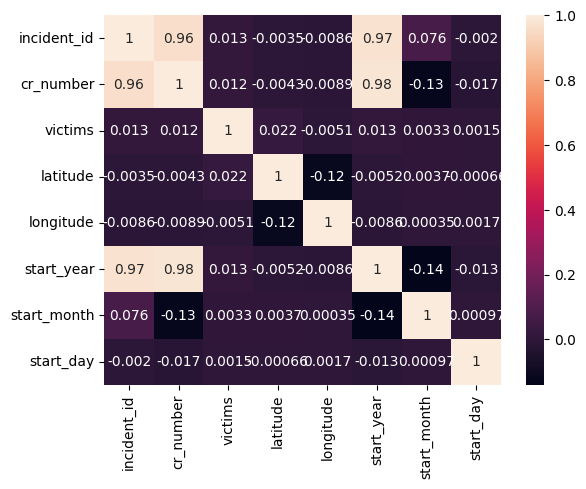

In [ ]:
dataplot = sns.heatmap(final_crime_data_set.corr(method="pearson", numeric_only=True), annot=True)
plt.show()

## D. Data Visualisations

### What is the distribution of crimes across phases of the day, does this vary based on the crime type?




In [ ]:
final_crime_data_set['day_phase'].value_counts()

,count
day_phase,
Afternoon,74666
Night,67894
Morning,41780
Evening,37225


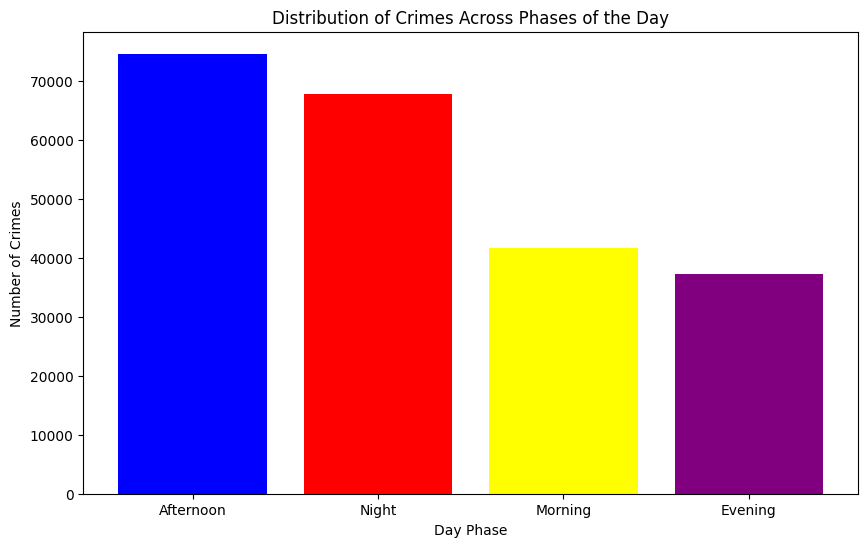

In [ ]:
plt.figure(figsize=(10, 6))
color = ['blue', 'red', 'yellow', 'purple']
plt.bar(final_crime_data_set['day_phase'].value_counts().index, final_crime_data_set['day_phase'].value_counts().values, color=color)
plt.xlabel('Day Phase')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes Across Phases of the Day')
plt.show()

In [ ]:
df = final_crime_data_set.groupby(['day_phase', 'crime_name1'])['crime_name1'].count().reset_index(name='count')
df

,day_phase,crime_name1,count
0,Afternoon,Crime Against Person,7173
1,Afternoon,Crime Against Property,38903
2,Afternoon,Crime Against Society,10953
3,Afternoon,Crime Against Society/Property/Person,26
4,Afternoon,Not a Crime,746
5,Afternoon,Other,16865
6,Evening,Crime Against Person,3879
7,Evening,Crime Against Property,18553
8,Evening,Crime Against Society,7578
9,Evening,Crime Against Society/Property/Person,8


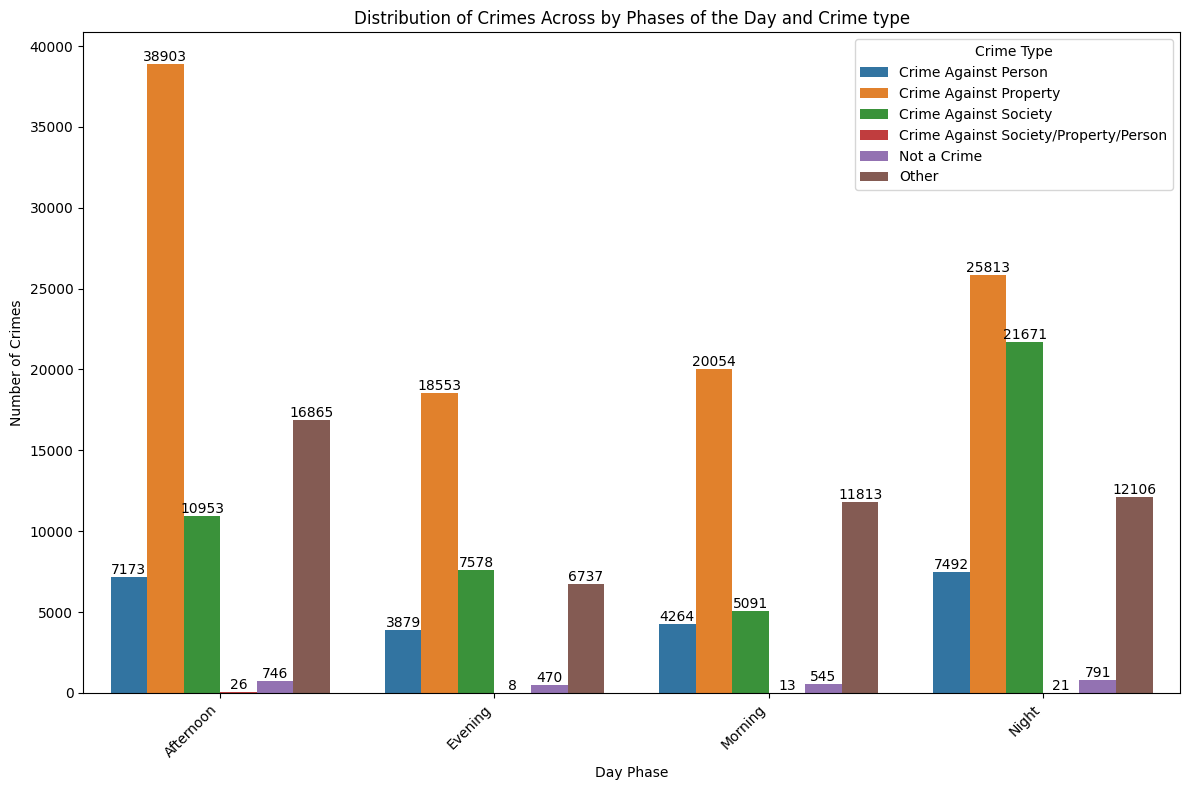

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='day_phase', y='count', hue='crime_name1')
plt.xlabel('Day Phase')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes Across by Phases of the Day and Crime type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', loc='upper right')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

### How do crime counts vary by police district annually, and which districts saw the most significant increase or decrease in crime over the years?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = final_crime_data_set.groupby('start_year')['police_district_name'].value_counts().unstack()
df = df.fillna(0)
df

police_district_name,BETHESDA,CITY OF TAKOMA PARK,GERMANTOWN,MONTGOMERY VILLAGE,OTHER,ROCKVILLE,SILVER SPRING,TAKOMA PARK,WHEATON
start_year,,,,,,,,,
2018,7216.0,1265.0,7215.0,8875.0,4.0,7458.0,11506.0,6.0,10789.0
2019,7024.0,1295.0,6203.0,8607.0,17.0,7126.0,11349.0,1.0,9834.0
2020,6465.0,1196.0,5737.0,7815.0,20.0,6390.0,9164.0,2.0,8123.0
2021,6695.0,742.0,5836.0,7705.0,27.0,5800.0,8816.0,473.0,7553.0
2022,4242.0,0.0,3537.0,4832.0,166.0,3422.0,5575.0,795.0,4647.0


<Figure size 2000x1400 with 0 Axes>

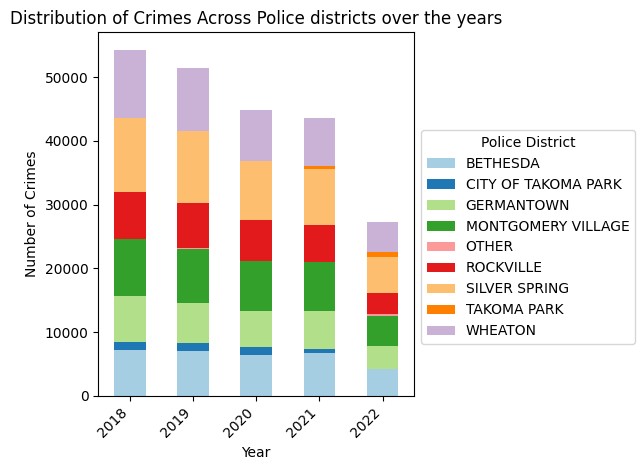

In [ ]:
plt.figure(figsize=(20, 14))
colors = sns.color_palette("Paired", len(df.columns))
df.plot.bar(stacked=True, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes Across Police districts over the years')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Police District', bbox_to_anchor=(1, 0.75))
plt.tight_layout()
plt.show()

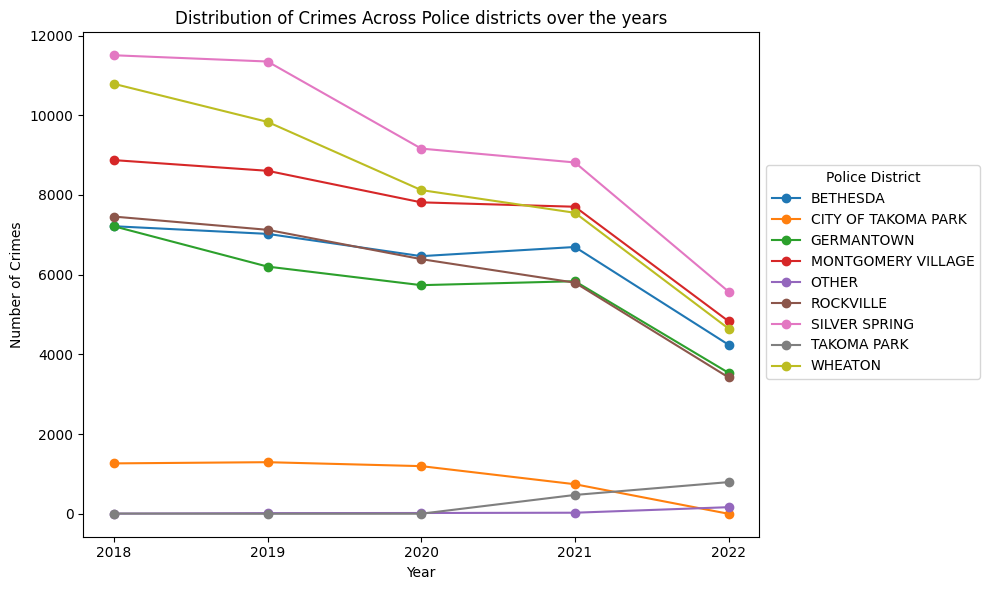

In [ ]:
plt.figure(figsize=(10, 6))

for column in df.columns:
    plt.plot(df.index, df[column], label=column, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes Across Police districts over the years')
years = df.index.unique()
plt.xticks(years, years)
plt.legend(title='Police District', bbox_to_anchor=(1, 0.75))
plt.tight_layout()
plt.show()

### How does the distribution of crimes vary across seasons, and does the total crime rate differ by year for each season?

In [ ]:
seasonal_crime_data = final_crime_data_set.groupby('season')['crime_name1'].count().reset_index()
seasonal_crime_data = seasonal_crime_data.rename(columns={'crime_name1': 'crime_count'})
seasonal_crime_data


,season,crime_count
0,Fall,49495
1,Spring,60823
2,Summer,56497
3,Winter,54750


Text(0.5, 1.0, 'Distribution of Crimes Across Seasons')

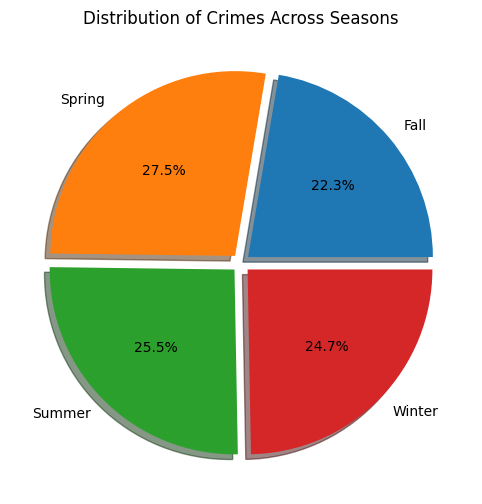

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(
    seasonal_crime_data['crime_count'],
    labels=seasonal_crime_data['season'],
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.05, 0.05, 0.05, 0.05]
    )
plt.title('Distribution of Crimes Across Seasons')

In [ ]:
yearly_seasonal_crime_data = final_crime_data_set.groupby('start_year')['season'].value_counts().unstack()
yearly_seasonal_crime_data

season,Fall,Spring,Summer,Winter
start_year,,,,
2018,13448.0,13582.0,14188.0,13116.0
2019,12942.0,13827.0,12881.0,11806.0
2020,11225.0,10482.0,11073.0,12132.0
2021,11880.0,10988.0,10315.0,10464.0
2022,NaN,11944.0,8040.0,7232.0


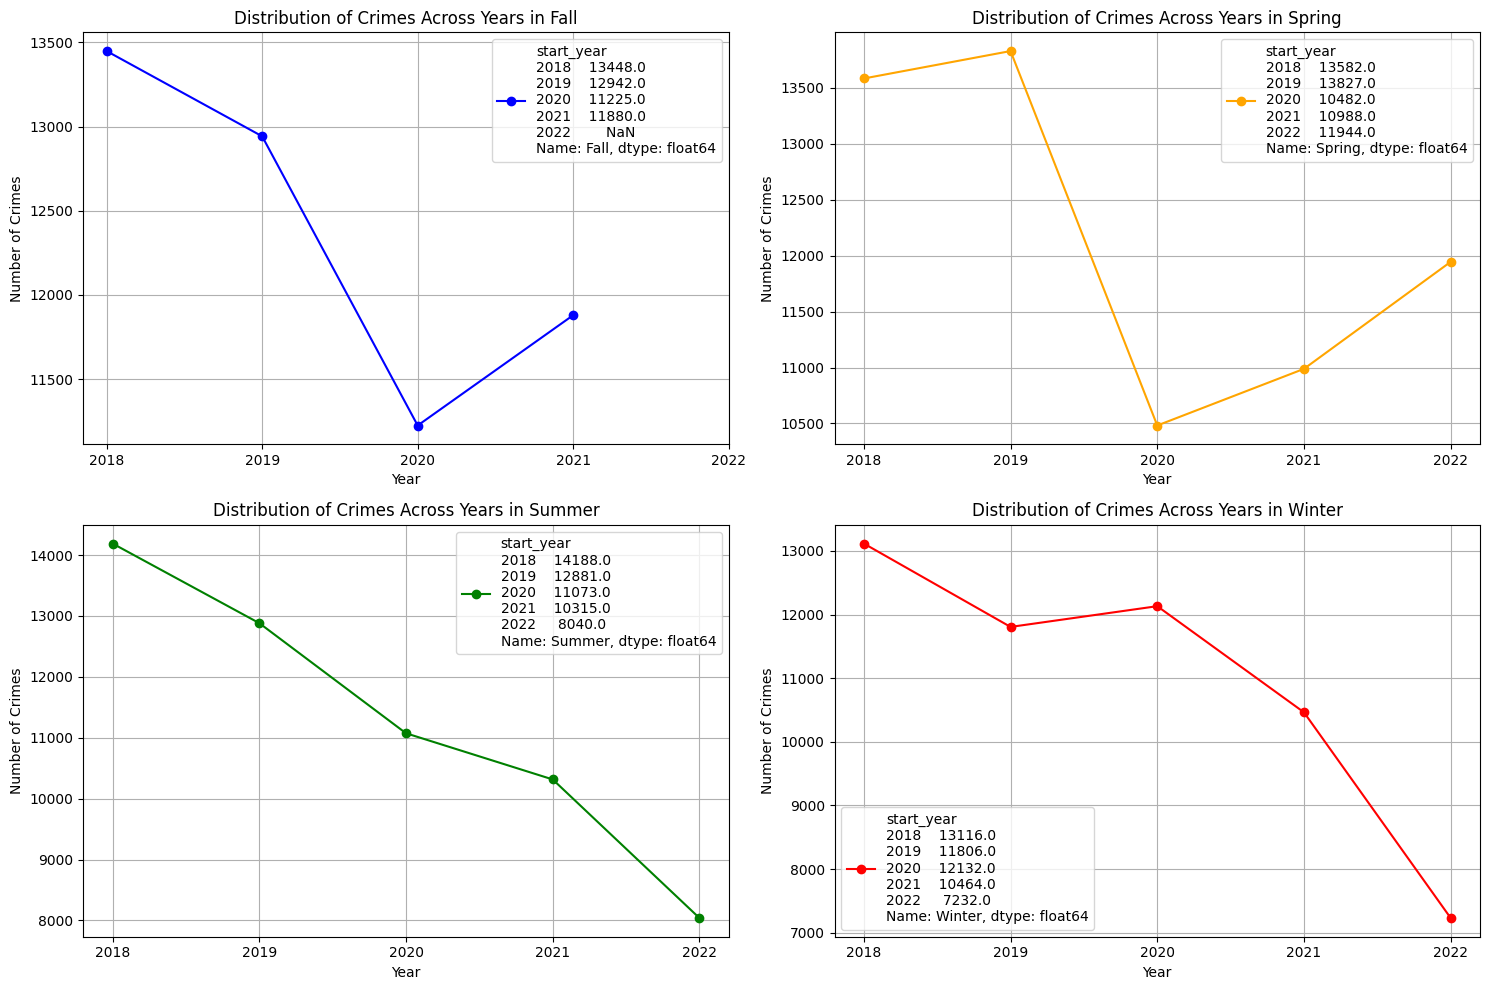

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['blue', 'orange', 'green', 'red']
axes = axes.flatten()

for i, column in enumerate(yearly_seasonal_crime_data.columns):
    ax = axes[i]
    ax.plot(yearly_seasonal_crime_data.index, yearly_seasonal_crime_data[column], label=yearly_seasonal_crime_data[column], marker='o', color=colors[i])
    ax.set_xlabel('Year')
    ax.set_xticks(yearly_seasonal_crime_data.index.unique())
    ax.set_ylabel('Number of Crimes')
    ax.set_title(f'Distribution of Crimes Across Years in {column}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Which crime subcategories recorded the most crimes in the top crime category Montgomery County from 2017 to 2022?

In [ ]:
crime_main_cat = final_crime_data_set.groupby('crime_name1')['crime_name1'].count().reset_index(name='count').sort_values(by='count', ascending=False)
crime_main_cat

,crime_name1,count
1,Crime Against Property,103323
5,Other,47521
2,Crime Against Society,45293
0,Crime Against Person,22808
4,Not a Crime,2552
3,Crime Against Society/Property/Person,68


It is Clear that most records were recorded are in the Crime Against Property Category

In [ ]:
property_crime_data = final_crime_data_set[final_crime_data_set['crime_name1'] == 'Crime Against Property']
property_crime_data = property_crime_data.groupby('crime_name2')['crime_name2'].count().reset_index(name='count').sort_values(by='count', ascending=False)
property_crime_data

,crime_name2,count
22,Theft From Motor Vehicle,18877
8,Destruction/Damage/Vandalism of Property,13642
20,Shoplifting,12274
1,All other Larceny,9952
14,Identity Theft,7887
23,Theft from Building,7862
5,Burglary/Breaking and Entering,6131
24,Theft of Motor Vehicle Parts or Accessories,5449
11,False Pretenses/Swindle/Confidence Game,5086
16,Motor Vehicle Theft,5069


In [ ]:
fig = px.treemap(
    property_crime_data,
    path=['crime_name2'],
    values='count',
    title='Crime Subcategories in Crime Against Property',
    color='count',
    color_continuous_scale='viridis'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_font_size=20
)
fig.show()


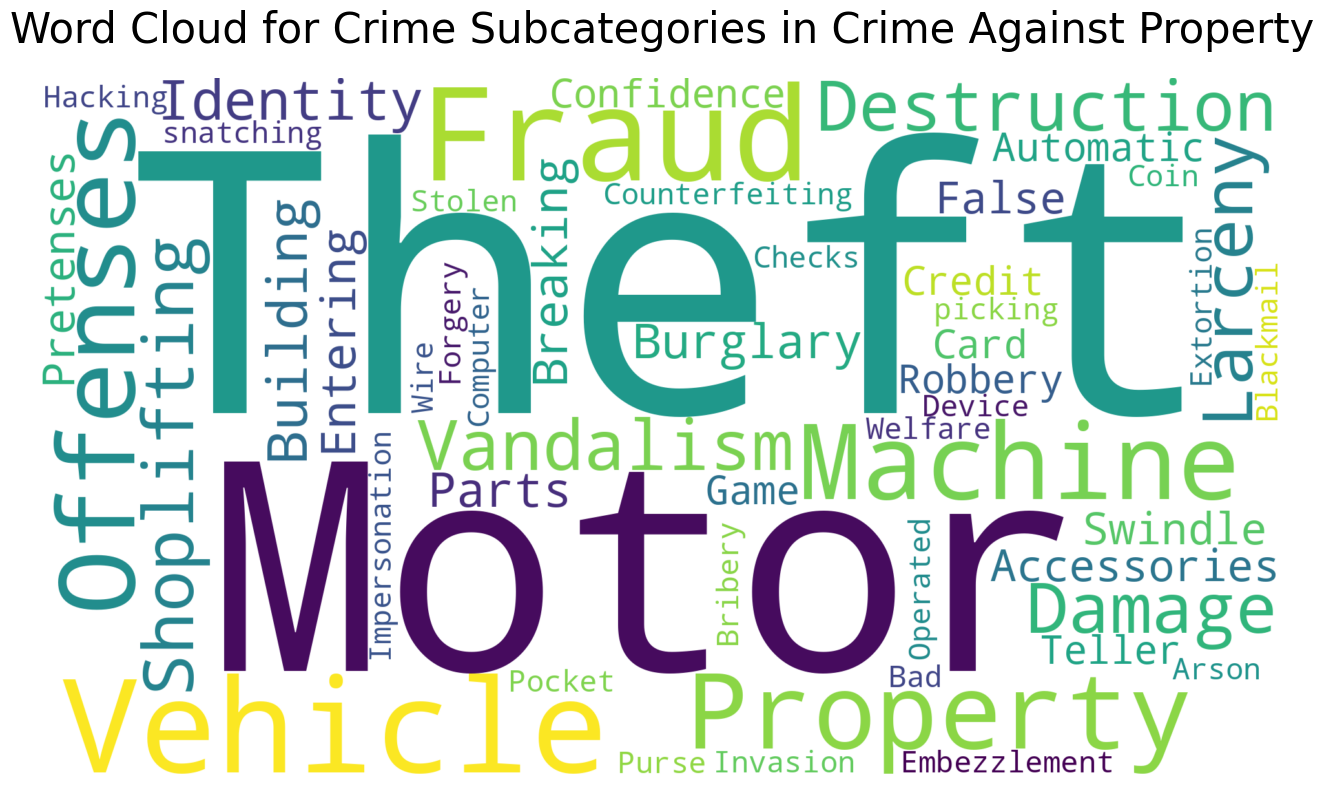

In [ ]:
text = " ".join(property_crime_data['crime_name2'])
word_cloud_for_property_crime = wd(
    background_color='white',
    width=1920,
    height=1080,
    random_state=13).generate(text)

plt.figure(figsize=(16, 10))
plt.imshow(word_cloud_for_property_crime, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Crime Subcategories in Crime Against Property', fontdict={'fontsize': 30}, pad=25)
plt.show()

### How do victim counts differ across street types, and what is the proportion of victims for each street type over the years?

In [ ]:
#First since there were some data with null street types lets remove those records
final_crime_data_with_street_type = final_crime_data_set[final_crime_data_set['street_type'].notna()]
final_crime_data_with_street_type

,incident_id,offence_code,cr_number,nibrs_code,victims,crime_name1,crime_name2,police_district_name,city,state,agency,place,sector,street_name,street_type,latitude,longitude,police_district_number,start_year,start_month,start_day,start_day_name,start_date,start_time,season,day_phase
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,GERMANTOWN,GERMANTOWN,MD,MCPD,Street - In vehicle,N,MIDDLEBROOK,RD,39.177744,-77.265619,5D,2018,8,23,Thursday,2018-08-23,21:52:00,Summer,Night
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,BETHESDA,BETHESDA,MD,MCPD,Street - In vehicle,E,WOODMONT,AVE,38.992693,-77.097063,2D,2018,3,30,Friday,2018-03-30,01:01:00,Spring,Night
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,BETHESDA,BETHESDA,MD,MCPD,Street - In vehicle,E,WOODMONT,AVE,38.992693,-77.097063,2D,2018,3,30,Friday,2018-03-30,01:01:00,Spring,Night
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Hotel/Motel/Etc.,P,QUINCE ORCHARD,RD,39.147954,-77.218189,6D,2018,6,14,Thursday,2018-06-14,22:26:00,Summer,Night
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BETHESDA,CHEVY CHASE,MD,MCPD,Residence - Single Family,E,FALSTONE,AVE,38.966174,-77.096561,2D,2018,9,2,Sunday,2018-09-02,23:30:00,Fall,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,201320571,1399,210006666,13B,1,Crime Against Person,Simple Assault,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Residence -Townhouse/Duplex,R,TRANSHIRE,RD,39.172701,-77.197340,6D,2021,2,20,Saturday,2021-02-20,20:00:00,Winter,Evening
221561,201329875,2305,210017101,23F,1,Crime Against Property,Theft From Motor Vehicle,WHEATON,SILVER SPRING,MD,MCPD,Parking Lot - Residential,K,ATHERTON,DR,39.059672,-77.075995,4D,2021,5,6,Thursday,2021-05-06,03:15:00,Spring,Night
221562,201329751,5016,210016952,90Z,1,Crime Against Society,All Other Offenses,GERMANTOWN,GERMANTOWN,MD,MCPD,Residence - Apartment/Condo,N,BALTUSROL,DR,39.199722,-77.273039,5D,2021,5,5,Wednesday,2021-05-05,22:38:00,Spring,Night
221563,201323117,9099,210009468,90Z,1,Crime Against Society,All Other Offenses,SILVER SPRING,SILVER SPRING,MD,MCPD,Street - Other,G,FENTON,ST,38.985813,-77.022915,3D,2021,3,13,Saturday,2021-03-13,13:35:00,Spring,Afternoon


In [ ]:
final_crime_data_with_street_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221476 entries, 0 to 221564
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             221476 non-null  int64  
 1   offence_code            221476 non-null  object 
 2   cr_number               221476 non-null  int64  
 3   nibrs_code              221476 non-null  object 
 4   victims                 221476 non-null  int64  
 5   crime_name1             221476 non-null  object 
 6   crime_name2             221476 non-null  object 
 7   police_district_name    221476 non-null  object 
 8   city                    221476 non-null  object 
 9   state                   221476 non-null  object 
 10  agency                  221476 non-null  object 
 11  place                   221476 non-null  object 
 12  sector                  221476 non-null  object 
 13  street_name             221476 non-null  object 
 14  street_type             2

In [ ]:
steet_type_crime_data = final_crime_data_with_street_type.groupby('street_type')['victims'].sum().reset_index()

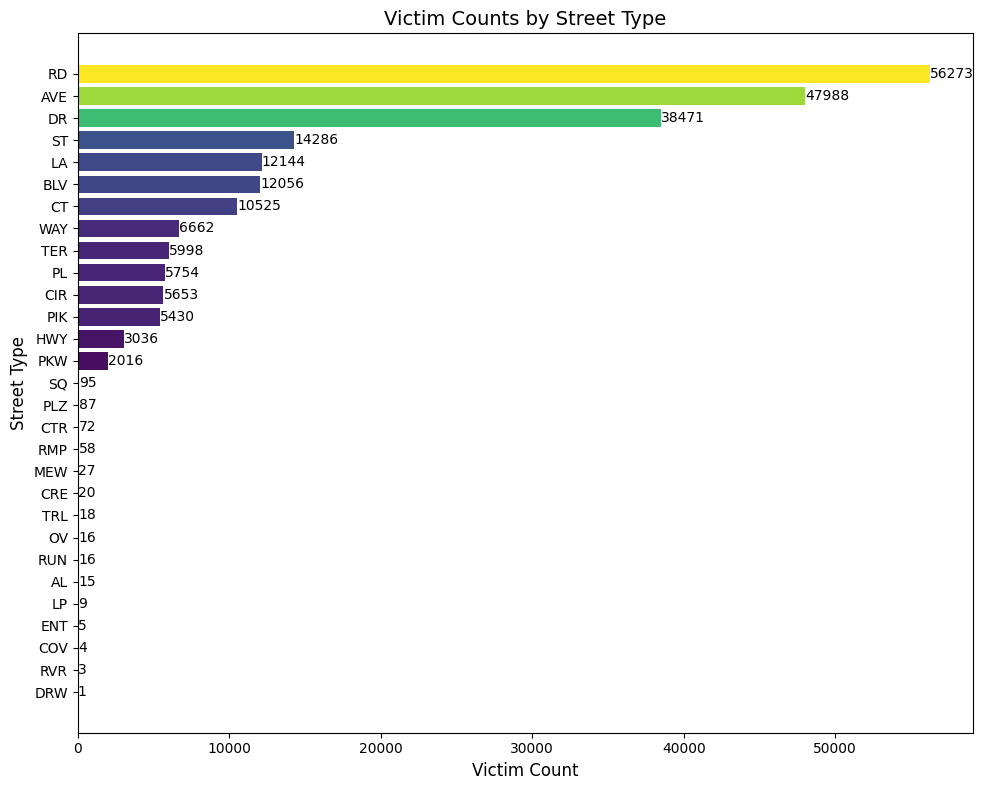

In [ ]:
steet_type_crime_data = steet_type_crime_data.sort_values(by='victims', ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(
    steet_type_crime_data['street_type'],
    steet_type_crime_data['victims'],
    color=plt.cm.viridis(steet_type_crime_data['victims'] / steet_type_crime_data['victims'].max())
)
for bar in bars:
    plt.text(
        bar.get_width() + 5,  # Offset from the bar
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        fontsize=10
    )
plt.xlabel('Victim Count', fontsize=12)
plt.ylabel('Street Type', fontsize=12)
plt.title('Victim Counts by Street Type', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Group data by street type, crime category, and subcategory, and sum the victim counts
road_crime_data = final_crime_data_set[final_crime_data_set['street_type'] == 'RD']

road_crime_data = road_crime_data.groupby(['crime_name1', 'crime_name2'])['victims'].sum().reset_index()

# Sort by victim count to identify top categories/subcategories
road_crime_data = road_crime_data.sort_values(by='victims', ascending=False)
road_crime_data

,crime_name1,crime_name2,victims
57,Other,All Other Offenses,11028
33,Crime Against Property,Shoplifting,5477
12,Crime Against Person,Simple Assault,4720
46,Crime Against Society,Drug/Narcotic Violations,4478
35,Crime Against Property,Theft From Motor Vehicle,3766
44,Crime Against Society,Driving Under the Influence,3422
21,Crime Against Property,Destruction/Damage/Vandalism of Property,3109
15,Crime Against Property,All other Larceny,2168
36,Crime Against Property,Theft from Building,2048
40,Crime Against Society,All Other Offenses,1556


In [ ]:
fig = px.treemap(road_crime_data,
                 path=['crime_name1', 'crime_name2'],
                 values='victims',
                 color='victims',
                 color_continuous_scale='viridis',
                 title='Victim Distribution Across Crime Categories and Street Types')

fig.show()

In [ ]:
#import custom classes
import sys
sys.path.append('/content/drive/MyDrive/data/ap_assignments')
%load_ext autoreload
%autoreload 2
from cls_UrbenChecker import UrbanChecker
from cls_UrbenChecker import Address
from cls_CrimeDataAnalyzer import CrimeDataAnalyzer

ModuleNotFoundError: No module named 'cls_UrbenChecker'

In [ ]:
#define file path to dataset
dataset_filepath = '/content/drive/MyDrive/data/ap_assignments/Crime_Dataset_Coursework1.csv'

In [ ]:
#load dataset to dataframe
crime_data = pd.read_csv(dataset_filepath,low_memory=False)

## Questions - Anushka


### 1.0 How has the average police dispatch-to-arrival time varied annually from 2018 to 2022


In [ ]:
cda_hypt_1 = CrimeDataAnalyzer(crime_data.copy())
#cda_hypt_1.clean_column_names()
#cda_hypt_1.get_summary()

In [ ]:
#clean data by "dispatch_date_time"
cda_hypt_1.clean_df_by_columns('dispatch_date_time')

In [ ]:
#convert dispatch_date_time , start_date_time, end_date_time in to datetime format
cda_hypt_1.convert_to_datetime('dispatch_date_time')
cda_hypt_1.convert_to_datetime('start_date_time')
cda_hypt_1.convert_to_datetime('end_date_time')

In [ ]:
#filter data to selected time period
cda_hypt_1.filter_by_two_dates('2017-12-31','2022-12-31')

In [ ]:
# Calculate dispatch to arrival time
cda_hypt_1._df['dispatch_to_arrival_time'] = (cda_hypt_1._df['start_date_time'] - cda_hypt_1._df['dispatch_date_time']).dt.total_seconds() / 60

In [ ]:
#invalid_dtat_df = cda_hypt_1._df[cda_hypt_1._df['dispatch_to_arrival_time'].isnull() | (cda_hypt_1._df['dispatch_to_arrival_time'] == '')]
#invalid_dtat_df

In [ ]:
# clean negitive dispatch_to_arrival_time
cda_hypt_1.filter_positive_dispatch_time('dispatch_to_arrival_time')

In [ ]:
# drop duplicates , based on 'incident_id','dispatch_date_time','start_date_time'
#cda_hypt_1._df.drop_duplicates(inplace=True)
cda_hypt_1._df.drop_duplicates(subset=['incident_id','dispatch_date_time','start_date_time'],inplace=True)
cda_hypt_1._df.reset_index(drop=True)

In [ ]:
cda_hypt_1._df.info()

In [ ]:
# Extract year and month
cda_hypt_1._df['Year'] = cda_hypt_1._df['start_date_time'].dt.year
cda_hypt_1._df['Month'] = cda_hypt_1._df['start_date_time'].dt.month

In [ ]:
#remove outliers based on dispatch_to_arrival_time x1
cda_hypt_1.remove_outliers('dispatch_to_arrival_time')

In [ ]:
#only in local pc
#cda_hypt_1.write_df_tofile('milestone1')

#### Overview

In [ ]:
# Group by Year and Month, then calculate the average
monthly_avg = cda_hypt_1._df.groupby(['Year', 'Month'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
monthly_avg['YearMonth'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(Day=1))

# Plot using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg, x='YearMonth', y='dispatch_to_arrival_time', marker="o")

# Configure y-axis ticks
#y_max = monthly_avg['dispatch_to_arrival_time'].max()
#y_ticks = range(0, int(y_max) + 60, 60)  # Adjust step size as necessary
#plt.yticks(y_ticks)

# Titles and labels
plt.title(' Average Police Dispatch-to-Arrival Time Over the years in Montgomery County ', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Dispatch-to-Arrival Time (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Hypothesis 1
* Null Hypothesis (H₀): <b>Sectors with urban infrastructure have no association between police dispatch-to-arrival times compared to rural or sparsely populated sectors from 2018 to 2022</b>
* Alternative Hypothesis (H₁):
<b>Sectors with urban infrastructure have shorter average police dispatch-to-arrival times compared to rural or sparsely populated sectors from 2018 to 2022</b>

* Create field 'sector_type' with 'Urban' or 'Rural' according to the 'latitude' and 'longitude'

In [ ]:
cda_hypt_1.get_summary()

In [ ]:
cda_hypt_1.clean_df_by_columns(['latitude','longitude'])

In [ ]:
uc = UrbanChecker();

In [ ]:
cda_hypt_1._df['sector_type'] = cda_hypt_1._df.apply(lambda row: uc.is_urban(Address(row['longitude'],row['latitude'])), axis=1)

In [ ]:
cda_hypt_1._df['sector_type'].describe()

In [ ]:
cda_hypt_1.write_df_tofile('milestone1.1')

In [ ]:
cda_hypt_1.load_df_fromfile('milestone1.1')

In [ ]:
cda_hypt_1.remove_outliers('dispatch_to_arrival_time')

In [ ]:
cda_hypt_1.filter_by_two_dates('2018-01-01','2022-12-31')

In [ ]:
cda_hypt_1._df['sector_type'].value_counts()

**In here, again we used ‘line plot’ to visualize the relationship between dispatch response time and the crime location as a sector, and the trend from 2018 to 2022**

In [ ]:
# Group by Year, Month, and sector_type, then calculate the average
monthly_avg = cda_hypt_1._df.groupby(['Year', 'Month', 'sector_type'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
monthly_avg['YearMonth'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(Day=1))

# Plot using seaborn with 'sector_type' as hue
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg, x='YearMonth', y='dispatch_to_arrival_time', hue='sector_type', marker="o")

# Configure y-axis ticks (every 60 minutes)
#y_max = monthly_avg['dispatch_to_arrival_time'].max()
#y_ticks = range(0, int(y_max) + 60, 60)
#plt.yticks(y_ticks)

# Titles and labels
plt.title('Average Police Dispatch-to-Arrival Time by Sector Type (Urban vs Rural)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Dispatch-to-Arrival Time (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### linear regression for each 'sector_type'

In [ ]:
import seaborn as sns

**In previous visualization we were unable to visualize the significant trend of the dispatch response time over the years, so to identify that trend we used Linear Regression for average dispatch response time with the crime location and visualize the trend over the years by using ‘lmplot’.  **

In [ ]:
# Group by Year, Month, and sector_type, then calculate the average
monthly_avg = cda_hypt_1._df.groupby(['Year', 'Month', 'sector_type'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
monthly_avg['YearMonth'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(Day=1))

# Convert YearMonth to a numeric value (e.g., number of months since the start of the data)
monthly_avg['MonthNumeric'] = (monthly_avg['YearMonth'] - monthly_avg['YearMonth'].min()) / pd.Timedelta('30D')

# Set a custom color palette for the two sector types
palette = sns.color_palette("Set2")

# Plot using seaborn with linear regression for each 'sector_type'
plt.figure(figsize=(14, 7))
g=sns.lmplot(data=monthly_avg, x='MonthNumeric', y='dispatch_to_arrival_time', hue='sector_type',
           palette=palette, aspect=2, height=7, ci=None, markers="o", line_kws={'linewidth': 2})

# Move the legend to the top-right corner
g._legend.set_bbox_to_anchor((1, 1))

# Titles and labels
plt.title('Average Police Dispatch-to-Arrival Time with Linear Regression by Sector Type', fontsize=16)
plt.xlabel('Month (Numeric)', fontsize=12)
plt.ylabel('Average Dispatch-to-Arrival Time (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis ticks back to Year-Month
xticks = monthly_avg['YearMonth'].dt.strftime('%Y-%m').unique()
plt.xticks(range(len(xticks)), xticks, rotation=45)

plt.tight_layout()

plt.show()

##### Insight
** The chart shows police response times in urban and rural areas over time. Urban areas have steady response times with a slight increase, while rural areas show more variation but a small decrease overall. Rural response times are generally longer than urban ones.

#### Hypothesis 2
* Null Hypothesis (H₀): <b>The average police dispatch-to-arrival time for high-severity offenses has not decreased across all sectors between 2018 and 2022</b>
* Alternative Hypothesis (H₁):
<b>The average police dispatch-to-arrival time for high-severity offenses has decreased across all sectors between 2018 and 2022</b>

In [ ]:
cda_hypt_1._df['nibrs_code'].unique()

In [ ]:
df = cda_hypt_1._df.copy()

In [ ]:
severity_mapping = {
    '35A': 'High', '26C': 'Medium', '90J': 'Low', '90F': 'Low', '90D': 'Low', '23D': 'Medium',
    '90G': 'Low', '240': 'High', '23C': 'Medium', '90Z': 'Low', '90C': 'Low', '520': 'High',
    '23G': 'Medium', '23F': 'Medium', '35B': 'High', '250': 'High', '23H': 'Medium',
    '290': 'High', '40C': 'Low', '13B': 'Medium', '11B': 'High', '220': 'High',
    '13A': 'High', '26F': 'Medium', '280': 'High', '11C': 'High',
    '40A': 'Low',  '11D': 'High',  '26A': 'Medium',  '120': 'High',
    "270": "High", "11A": "High", "26B": "Medium", "90B": "Low", "90E": "Low", "13C": "Medium",
    "90A": "Low", "23A": "Medium", "200": "High", "23B": "Medium", "90H": "Low", "210": "High",
    "26E": "Medium"
}


In [ ]:
df['severity'] = df['nibrs_code'].map(severity_mapping)

In [ ]:
df['sector_type'].value_counts()

In [ ]:
# Group by Year, Month, sector_type, and severity, then calculate the average dispatch time
grouped_data = df.groupby(['Year', 'Month', 'sector_type', 'severity'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
grouped_data['YearMonth'] = pd.to_datetime(grouped_data[['Year', 'Month']].assign(Day=1))

# Step 1: Generate all possible combinations of YearMonth, sector_type, and severity
all_combinations = pd.MultiIndex.from_product([
    grouped_data['YearMonth'].unique(),
    grouped_data['sector_type'].unique(),
    grouped_data['severity'].unique()
], names=['YearMonth', 'sector_type', 'severity'])

# Step 2: Reindex the data to include all combinations and fill missing values with NaN
complete_data = grouped_data.set_index(['YearMonth', 'sector_type', 'severity']).reindex(all_combinations).reset_index()

# Step 3: Interpolate missing values (optional)
complete_data['dispatch_to_arrival_time'] = complete_data['dispatch_to_arrival_time'].interpolate()

# Step 4: Plot using catplot
sns.set_style("whitegrid")
g = sns.catplot(
    data=complete_data,
    x="YearMonth",
    y="dispatch_to_arrival_time",
    hue="sector_type",
    col="severity",
    kind="point",
    aspect=2,
     col_wrap=1,  # Ensures one column, stacked vertically
    height=4,
    palette="Set2"
)

# Rotate x-axis labels for better readability

g.set_axis_labels("Year-Month", "Average Dispatch-to-Arrival Time (minutes)")
g.set_titles("Severity - {col_name}")
g.fig.suptitle("Dispatch-to-Arrival Time by Severity and Sector Type", y=1.05, fontsize=16)

# Format x-axis ticks to show Year-Month labels
unique_year_months = grouped_data['YearMonth'].dt.strftime('%Y-%m').unique()
plt.xticks(range(len(unique_year_months)), unique_year_months, rotation=60)

plt.tight_layout()
plt.show()

##### Regression: Dispatch-to-Arrival Time by Severity and Sector Type

Just like the previous visualization we were unable to visualize the significant trend of the dispatch response time over the years based on the severity of the crime so to identify that trend we used Linear Regression for average dispatch response time with the crime location according to the severity of the crime and visualize the trend over the years by using ‘Cat plot’ .  

In [ ]:
# Group by Year, Month, sector_type, and severity, then calculate the average dispatch time
grouped_data = df.groupby(['Year', 'Month', 'sector_type', 'severity'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
grouped_data['YearMonth'] = pd.to_datetime(grouped_data[['Year', 'Month']].assign(Day=1))

# Convert YearMonth to a numeric value for regression fitting
grouped_data['MonthNumeric'] = (grouped_data['YearMonth'] - grouped_data['YearMonth'].min()) / pd.Timedelta('30D')

# Step 1: Generate all possible combinations of YearMonth, sector_type, and severity
all_combinations = pd.MultiIndex.from_product([
    grouped_data['YearMonth'].unique(),
    grouped_data['sector_type'].unique(),
    grouped_data['severity'].unique()
], names=['YearMonth', 'sector_type', 'severity'])

# Step 2: Reindex the data to include all combinations and fill missing values with NaN
complete_data = grouped_data.set_index(['YearMonth', 'sector_type', 'severity']).reindex(all_combinations).reset_index()

# Step 3: Interpolate missing values
complete_data['dispatch_to_arrival_time'] = complete_data['dispatch_to_arrival_time'].interpolate()

# Step 4: Convert YearMonth to numeric for regression
complete_data['MonthNumeric'] = (complete_data['YearMonth'] - complete_data['YearMonth'].min()) / pd.Timedelta('30D')

# Step 5: Plot regression using lmplot
sns.set_style("whitegrid")
g = sns.lmplot(
    data=complete_data,
    x="MonthNumeric",
    y="dispatch_to_arrival_time",
    hue="sector_type",
    col="severity",
    col_wrap=1,  # Ensures one column, stacked vertically
    height=4,
    aspect=2,
    palette="Set2",
    ci=None,
    markers="o"
)

# Titles and labels
g.set_axis_labels("Month (Numeric)", "Average Dispatch-to-Arrival Time (minutes)")
g.set_titles("Severity - {col_name}")
g.fig.suptitle("Regression: Dispatch-to-Arrival Time by Severity and Sector Type", y=1.05, fontsize=16)

# Format x-axis ticks to show Year-Month labels
unique_year_months = grouped_data['YearMonth'].dt.strftime('%Y-%m').unique()
plt.xticks(range(len(unique_year_months)), unique_year_months, rotation=60)

plt.tight_layout()
plt.show()

In [ ]:
# Group by Year, Month, sector_type, and severity, then calculate the average dispatch time
grouped_data = df.groupby(['Year', 'Month', 'sector_type', 'severity'])['dispatch_to_arrival_time'].mean().reset_index()

# Create a new column for Year-Month for better plotting
grouped_data['YearMonth'] = pd.to_datetime(grouped_data[['Year', 'Month']].assign(Day=1))

# Convert YearMonth to a numeric value for regression fitting
grouped_data['MonthNumeric'] = (grouped_data['YearMonth'] - grouped_data['YearMonth'].min()) / pd.Timedelta('30D')

# Step 1: Generate all possible combinations of YearMonth, sector_type, and severity
all_combinations = pd.MultiIndex.from_product([
    grouped_data['YearMonth'].unique(),
    grouped_data['sector_type'].unique(),
    grouped_data['severity'].unique()
], names=['YearMonth', 'sector_type', 'severity'])

# Step 2: Reindex the data to include all combinations and fill missing values with NaN
complete_data = grouped_data.set_index(['YearMonth', 'sector_type', 'severity']).reindex(all_combinations).reset_index()

# Step 3: Interpolate missing values
complete_data['dispatch_to_arrival_time'] = complete_data['dispatch_to_arrival_time'].interpolate()

# Step 4: Convert YearMonth to numeric for regression
complete_data['MonthNumeric'] = (complete_data['YearMonth'] - complete_data['YearMonth'].min()) / pd.Timedelta('30D')

# Set up the FacetGrid for multi-panel plot
sns.set_style("whitegrid")
g = sns.FacetGrid(complete_data, col="sector_type", hue="severity",  aspect=2, palette="Set2",col_wrap=1, height=6)

# Plot the scatter points with regression line
g.map(sns.regplot, "MonthNumeric", "dispatch_to_arrival_time", scatter=True, ci=None)

# Titles and labels
g.set_axis_labels("Month (Numeric)", "Average Dispatch-to-Arrival Time (minutes)")
g.set_titles("{col_name} Sector")
g.fig.suptitle("Dispatch-to-Arrival Time by Severity and Sector Type with Regression", y=1.05, fontsize=16)

# Format x-axis ticks to show Year-Month labels
unique_year_months = grouped_data['YearMonth'].dt.strftime('%Y-%m').unique()
plt.xticks(range(len(unique_year_months)), unique_year_months, rotation=75)

g.add_legend(title="Severity", label_order=["High", "Medium", "Low"])
g._legend.set_bbox_to_anchor((1,1))

plt.tight_layout()
plt.show()

##### Insight
** This charts also shows the same how urban areas generally have faster police response times among all severity levels compared to rural areas. In this visualization with regression the differences are most noticeable in high-severity cases.

### 2.0 What is the number of incident for severity of crimes in each Police District from 2019 to 2022?

In [ ]:
cda_hypt_1 = CrimeDataAnalyzer(crime_data.copy())

In [ ]:
cda_hypt_1.clean_column_names()

In [ ]:
cda_hypt_1._df.drop_duplicates(inplace=True)

In [ ]:
cda_hypt_1._df.drop_duplicates(subset=['incident_id','start_date_time'],inplace=True).reset_index(drop=True)

In [ ]:
cda_hypt_1._df.info()

In [ ]:
cda_hypt_1.convert_to_datetime('dispatch_date_time')
cda_hypt_1.convert_to_datetime('start_date_time')
cda_hypt_1.convert_to_datetime('end_date_time')

In [ ]:
cda_hypt_1.filter_by_two_dates('2018-01-01','2022-12-31')

In [ ]:
# Extract year and month
cda_hypt_1._df['Year'] = cda_hypt_1._df['start_date_time'].dt.year
cda_hypt_1._df['Month'] = cda_hypt_1._df['start_date_time'].dt.month

In [ ]:
severity_mapping = {
    '35A': 'High', '26C': 'Medium', '90J': 'Low', '90F': 'Low', '90D': 'Low', '23D': 'Medium',
    '90G': 'Low', '240': 'High', '23C': 'Medium', '90Z': 'Low', '90C': 'Low', '520': 'High',
    '23G': 'Medium', '23F': 'Medium', '35B': 'High', '250': 'High', '23H': 'Medium',
    '290': 'High', '40C': 'Low', '13B': 'Medium', '11B': 'High', '220': 'High',
    '13A': 'High', '26F': 'Medium', '280': 'High', '11C': 'High',
    '40A': 'Low',  '11D': 'High',  '26A': 'Medium',  '120': 'High',
    "270": "High", "11A": "High", "26B": "Medium", "90B": "Low", "90E": "Low", "13C": "Medium",
    "90A": "Low", "23A": "Medium", "200": "High", "23B": "Medium", "90H": "Low", "210": "High",
    "26E": "Medium"
}
cda_hypt_1._df['severity'] = cda_hypt_1._df['nibrs_code'].map(severity_mapping)

In [ ]:
cda_hypt_1.write_df_tofile('milestone1_q2_hyp1_b4')

In [ ]:
cda_hypt_1.load_df_fromfile('milestone1_q2_hyp1_b4')

In [ ]:
cda_hypt_1._df.dropna(inplace=True)

In [ ]:
grouped_df = cda_hypt_1._df.groupby(['Year', 'police_district_name'])['severity'].value_counts().unstack().reset_index()

In [ ]:
grouped_df.info()

#### Overview

In [ ]:
#grouped_df = cda_hypt_1._df.groupby(['Year', 'police_district_name'])['severity'].value_counts().unstack().reset_index()

# Melting the DataFrame for seaborn compatibility
melted_data = grouped_df.melt(id_vars=['Year', 'police_district_name'], var_name='severity', value_name='count')

# Creating the catplot with `col` for separate plots by year
g = sns.catplot(
    data=melted_data,
    x='police_district_name',
    y='count',
    hue='severity',
    col='Year',  # Separate plots for each year
    kind='bar',
    height=6,
    aspect=1.5,
    col_wrap=2  # Adjusts the layout if there are many years
)
# Customizing x-tick labels to display police district names


# Adjusting the appearance
g.set_xticklabels(grouped_df['police_district_name'].unique(),rotation=45)
g.set_axis_labels('Police District', 'Count')
g.set_titles("Year: {col_name}")


plt.show()

#### Hypothesis 1
* Null Hypothesis (H₀): <b>The severity of crimes does not varies across different police districts from 2019 to 2022</b>
* Alternative Hypothesis (H₁):
<b>The severity of crimes significantly varies across different police districts from 2019 to 2022</b>

In [ ]:
# Assuming df is your DataFrame
heatmap_data = cda_hypt_1._df.pivot_table(values='severity', index='police_district_name', columns='Year', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Crime Severity by District and Year")
plt.show()

In [ ]:
grouped = cda_hypt_1._df.groupby(['Year', 'police_district_name']).size().reset_index(name='Count')
for district in grouped['police_district_name'].unique():
    subset = grouped[grouped['police_district_name'] == district]
    plt.plot(subset['Year'], subset['Count'], label=district)

plt.legend(loc=(1,0))
plt.title("Crime Severity Trends Across Police Districts")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

##### Insights
On this heatmap it shows Silver Spring consistently shows the highest crime severity, while most districts see a declining trend from 2018 to 2022.

#### Hypothesis 2
* Null Hypothesis (H₀): <b>The total number of incidents has no trend (increase or decrease) from 2019 to 2022 in each police district.</b>
* Alternative Hypothesis (H₁):
<b>The total number of incidents for low severe crimes has shown a significant trend (increase or decrease) from 2019 to 2022 in each police district.</b>

In [ ]:
severe_crimes = cda_hypt_1._df[cda_hypt_1._df['severity'] == 'Low']

# Aggregate data
trend_data = severe_crimes.groupby(['Year', 'police_district_name']).size().reset_index(name='Count')

# Plot trends for each district
for district in trend_data['police_district_name'].unique():
    subset = trend_data[trend_data['police_district_name'] == district]
    plt.plot(subset['Year'], subset['Count'], label=district)

plt.legend(loc=(1,0))
plt.title("Trend of Severe Crimes (2019-2022) by District")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

In [ ]:
# Pivot table for heatmap
heatmap_data = severe_crimes.pivot_table(values='severity', index='police_district_name', columns='Year', aggfunc='count')

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Severe Crime Trends (2019-2022) by District")
plt.xlabel("Year")
plt.ylabel("Police District")
plt.show()

##### Insights
In this heatmap also sows the same trend but at this time we only consider low severity crime only

### 3.0 How does the average time taken to resolve incidents vary across different police districts?"

In [ ]:
cda_hypt_1 = CrimeDataAnalyzer(crime_data.copy())

In [ ]:
cda_hypt_1.clean_column_names()

In [ ]:
cda_hypt_1._df.drop_duplicates(inplace=True)

In [ ]:
cda_hypt_1.convert_to_datetime('dispatch_date_time')
cda_hypt_1.convert_to_datetime('start_date_time')
cda_hypt_1.convert_to_datetime('end_date_time')

In [ ]:
cda_hypt_1._df.drop_duplicates(subset=['incident_id','start_date_time'],inplace=True).reset_index(drop=True)

In [ ]:
cda_hypt_1._df.info()

In [ ]:
cda_hypt_1._df['solving_time'] = (cda_hypt_1._df['end_date_time'] - cda_hypt_1._df['start_date_time']).dt.total_seconds() / 3600  # in hours

# Group by police district and calculate the average solving time
avg_solving_time = cda_hypt_1._df.groupby('police_district_name')['solving_time'].mean()

# Plot the data
avg_solving_time.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Incident Solving Time by Police District')
plt.xlabel('Police District')
plt.ylabel('Average Solving Time (hours)')
plt.xticks(rotation=90)
plt.show()

#### Hypothesis 1
* Null Hypothesis (H₀): <b>The Incident Solving Time will not vary Across Police Districts .</b>
* Alternative Hypothesis (H₁):
<b>The Incident Solving Time will vary Across Police Districts .</b>

In [ ]:
cda_hypt_1.remove_outliers('solving_time')

In [ ]:
valid_solvingtimes = cda_hypt_1._df[cda_hypt_1._df['solving_time']>0]

In [ ]:
df = valid_solvingtimes

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='police_district_name', y='solving_time', data=df, palette="Set2")
plt.title('Variation in Incident Solving Time Across Police Districts')
plt.xlabel('Police District')
plt.ylabel('Incident Solving Time (hours)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the mean solving time per district
avg_solving_time = df.groupby('police_district_name')['solving_time'].mean().reset_index()

# Pivot the data to create a matrix for heatmap
heatmap_data = avg_solving_time.pivot_table(index='police_district_name', values='solving_time')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar_kws={'label': 'Average Solving Time (hours)'})
plt.title('Average Incident Solving Time by Police District')
plt.ylabel('Police District')
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='police_district_name', col_wrap=4, height=4)
g.map(sns.histplot, 'solving_time', kde=True)
g.set_axis_labels('Incident Solving Time (hours)', 'Frequency')
g.set_titles('Police District {col_name}')
plt.show()

##### Insights
This figure shows histograms of incident solving time for different police districts. Most districts have a right-skewed distribution with a long tail towards higher solving times. Silver Spring has the highest peak around 10 hours, suggesting a large number of incidents were solved within that timeframe.
The lowest peak is seen in Wheaton around 10 hours, indicating a lower frequency of incidents solved in that time range.


#### Hypothesis 2
* Null Hypothesis (H₀): <b>Police districts with higher crime volume have no accosiaction with incident resolution times.</b>
* Alternative Hypothesis (H₁):<b>Police districts with higher crime volume have longer average incident resolution times.</b>

In [ ]:
# Calculate solving time (difference between end and start)
df['solving_time'] = (df['end_date_time'] - df['start_date_time']).dt.total_seconds() / 3600  # in hours

# Calculate crime volume (number of incidents per district)
crime_volume = df.groupby('police_district_name').size().reset_index(name='crime_volume')

# Calculate average solving time per district
avg_solving_time = df.groupby('police_district_name')['solving_time'].mean().reset_index(name='avg_solving_time')

# Merge crime volume and avg solving time into a single dataframe
merged_data = pd.merge(crime_volume, avg_solving_time, on='police_district_name')

# Plot the data using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
# Add police district names inside the bubbles
for i, row in merged_data.iterrows():
    plt.text(
        row['crime_volume'],
        row['avg_solving_time'],
        row['police_district_name'],
        fontsize=9,
        ha='center',
        va='center',
        color='black'  # White text for better contrast on dark bubbles
    )
sns.regplot(x='crime_volume', y='avg_solving_time', data=merged_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Crime Volume vs Average Incident Resolution Time')
plt.xlabel('Crime Volume (Number of Incidents)')
plt.ylabel('Average Incident Solving Time (hours)')
plt.show()

In [ ]:
# Calculate solving time (difference between end and start)
df['solving_time'] = (df['end_date_time'] - df['start_date_time']).dt.total_seconds() / 3600  # in hours

# Calculate crime volume (number of incidents per district)
crime_volume = df.groupby('police_district_name').size().reset_index(name='crime_volume')

# Calculate average solving time per district
avg_solving_time = df.groupby('police_district_name')['solving_time'].mean().reset_index(name='avg_solving_time')

# Merge crime volume and avg solving time into a single dataframe
merged_data = pd.merge(crime_volume, avg_solving_time, on='police_district_name')

# Create bubble plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=merged_data['crime_volume'],
    y=merged_data['avg_solving_time'],
    s=merged_data['crime_volume']*2,  # Bubble size based on crime volume, scaled
    alpha=0.6,
    c='blue',
    edgecolors='w',
    linewidth=0.5
)

# Add police district names inside the bubbles
for i, row in merged_data.iterrows():
    plt.text(
        row['crime_volume'],
        row['avg_solving_time'],
        row['police_district_name'],
        fontsize=9,
        ha='center',
        va='center',
        color='black'  # White text for better contrast on dark bubbles
    )

# Title and labels
plt.title('Crime Volume vs Average Incident Resolution Time (Bubble Plot with District Names)')
plt.xlabel('Crime Volume (Number of Incidents)')
plt.ylabel('Average Incident Solving Time (hours)')

# Show plot
plt.show()

##### Insights
This bubble chart shows the relationship between crime volume and average incident resolution time for different police districts. The size of the bubbles represents the number of incidents.

### 4.0 How does crime density vary across different days of the week ?

In [ ]:
cda_hypt_1 = CrimeDataAnalyzer(crime_data.copy())

In [ ]:
cda_hypt_1.clean_column_names()

In [ ]:
cda_hypt_1._df.drop_duplicates(inplace=True)

In [ ]:
cda_hypt_1.convert_to_datetime('start_date_time')
cda_hypt_1.convert_to_datetime('end_date_time')

In [ ]:
cda_hypt_1._df.drop_duplicates(subset=['incident_id','start_date_time'],inplace=True)

In [ ]:
cda_hypt_1.filter_by_two_dates('2018-01-01','2022-12-31')

In [ ]:
cda_hypt_1._df.info()

##### * Calculate the day of the week

In [ ]:
cda_hypt_1._df['day_of_week'] = cda_hypt_1._df['start_date_time'].dt.day_name()

In [ ]:
df = cda_hypt_1._df.copy()

#### Hypothesis 1
* Null Hypothesis (H₀):<b>Crime density has no association with weekdays</b>
* Alternative Hypothesis (H₁):<b>Crime density is higher on weekends (Saturday and Sunday) compared to weekdays, as social activities and gatherings increase the likelihood of incidents.</b>

In [ ]:
# Data for weekdays and weekends
crime_density = df['category'].value_counts()
explode_values = [0, 0.1]
# Pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'salmon']
plt.pie(crime_density, labels=crime_density.index,
        autopct='%1.1f%%', startangle=140,
        explode=explode_values, colors=colors, shadow=True)
plt.title("Proportion of Crimes: Weekdays vs Weekends", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Extract dates and categories
df['date'] = df['start_date_time'].dt.date
daily_trend = df.groupby(['date', 'category']).size().unstack(fill_value=0)

# Plot daily trends
plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend['Weekday'], label='Weekday', color='skyblue', linewidth=2)
plt.plot(daily_trend.index, daily_trend['Weekend'], label='Weekend', color='salmon', linewidth=2)

# Formatting
plt.title("Crime Trends: Weekdays vs Weekends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Insights
This chart shows the number of crimes on weekdays and weekends over time. Crime rates fluctuate over time, with some peaks and valleys. Weekends generally see a slight increase in crime compared to weekdays, particularly during 2020 and 2021.

#### Hypothesis 2
* Null Hypothesis (H₀):<b>Crime density is not uniform throughout the week</b>
* Alternative Hypothesis (H₁):<b>Crime density is relatively uniform throughout the week, with minor variations due to consistent enforcement and urban activity patterns.</b>

In [ ]:
crime_density = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(crime_density.index, crime_density.values, color='lightgreen', edgecolor='black')

# Add text annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

# Formatting the plot
plt.title("Crime Density by Day of the Week (Hypothesis 2: Uniform Distribution)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

##### Insights
This bar chart shows the number of crimes by day of the week. Crime rates are relatively consistent throughout the week, with Friday having the highest number of incidents (14436) and Sunday having the lowest (11888). This suggests that crime is not significantly concentrated on any particular day of the week.

### 5.0 How does the distribution of crime locations vary across different geographical regions?"

In [ ]:
cda_hypt_1 = CrimeDataAnalyzer(crime_data.copy())

In [ ]:
cda_hypt_1.clean_column_names()

In [ ]:
cda_hypt_1._df.drop_duplicates(inplace=True)

In [ ]:
cda_hypt_1.convert_to_datetime('start_date_time')
cda_hypt_1.convert_to_datetime('end_date_time')

In [ ]:
cda_hypt_1.filter_by_two_dates('2018-01-01','2022-12-31')

In [ ]:
cda_hypt_1._df.drop_duplicates(subset=['latitude','longitude'],inplace=True)

In [ ]:
# Extract year and month
cda_hypt_1._df['Year'] = cda_hypt_1._df['start_date_time'].dt.year
cda_hypt_1._df['Month'] = cda_hypt_1._df['start_date_time'].dt.month

In [ ]:
uc = UrbanChecker();

In [ ]:
cda_hypt_1._df['sector_type'] = cda_hypt_1._df.apply(lambda row: uc.is_urban(Address(row['longitude'],row['latitude'])), axis=1)

In [ ]:
cda_hypt_1.write_df_tofile('milestone1_q2_hyp1_b4')

In [ ]:
cda_hypt_1._df['sector_type'].info()

In [ ]:
cda_hypt_1._df = cda_hypt_1._df.groupby('Year').apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x).reset_index(drop=True)

In [ ]:
distinct_years_df = cda_hypt_1._df[['Year']].drop_duplicates().reset_index(drop=True)

In [ ]:
distinct_years_df

In [ ]:
cda_hypt_1.create_custom_map(distinct_years_df,'latitude','longitude','Incident :{incident_id} <br/>Sector : {sector_type}<br/>Date : {start_date_time}<br/>No of Victim : {victims}<br/>Type : {crime_name1}', 'Year','sector_type')